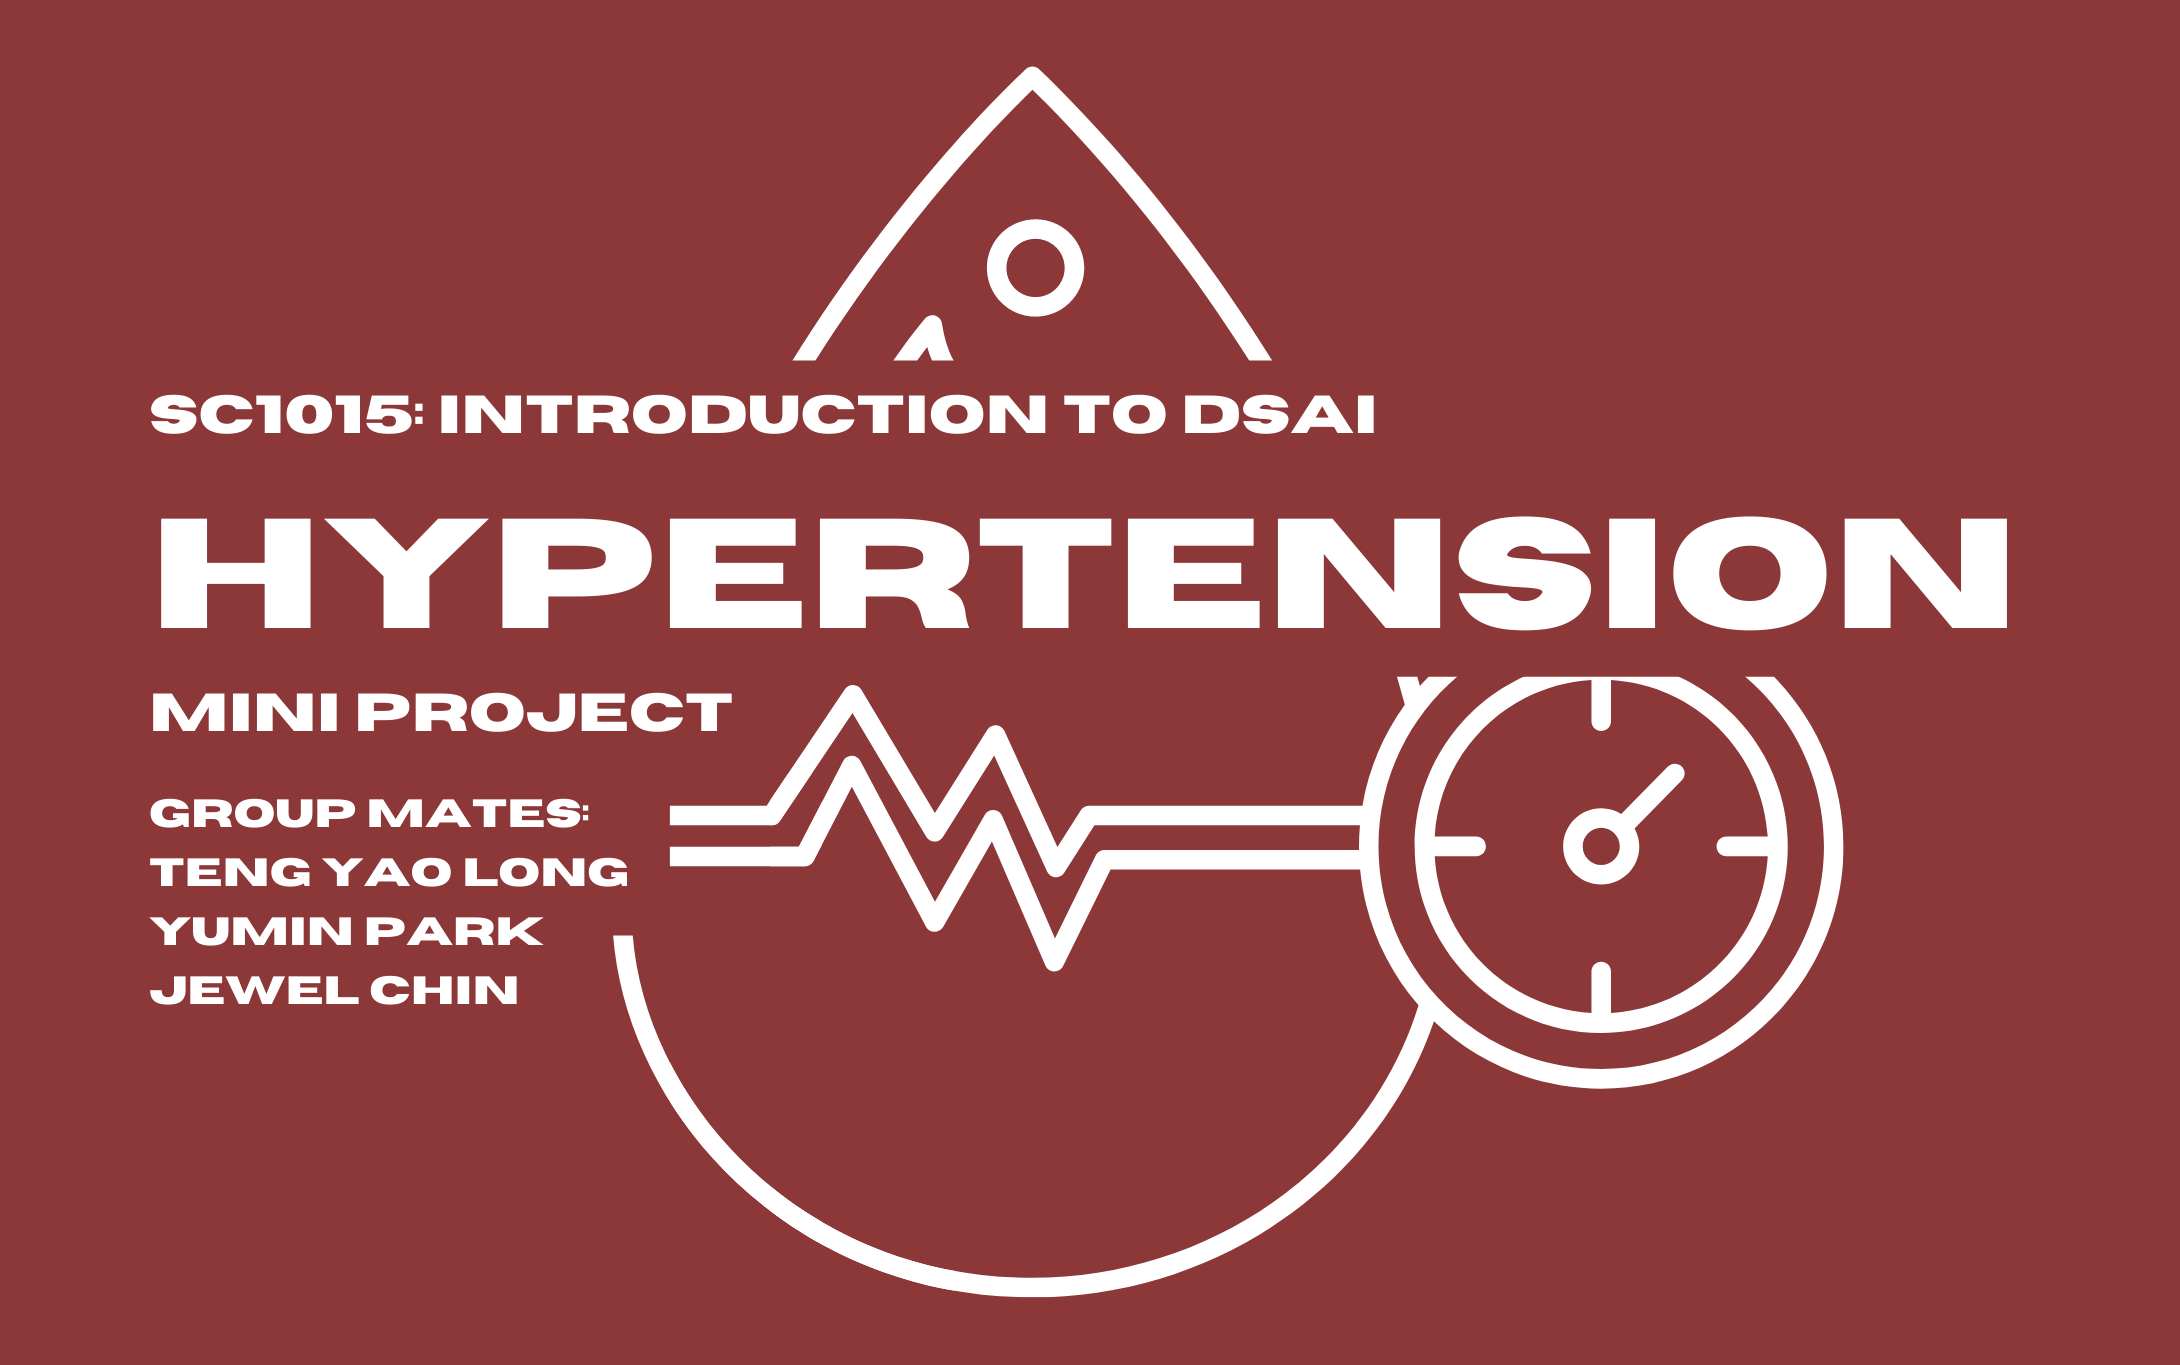

<div>
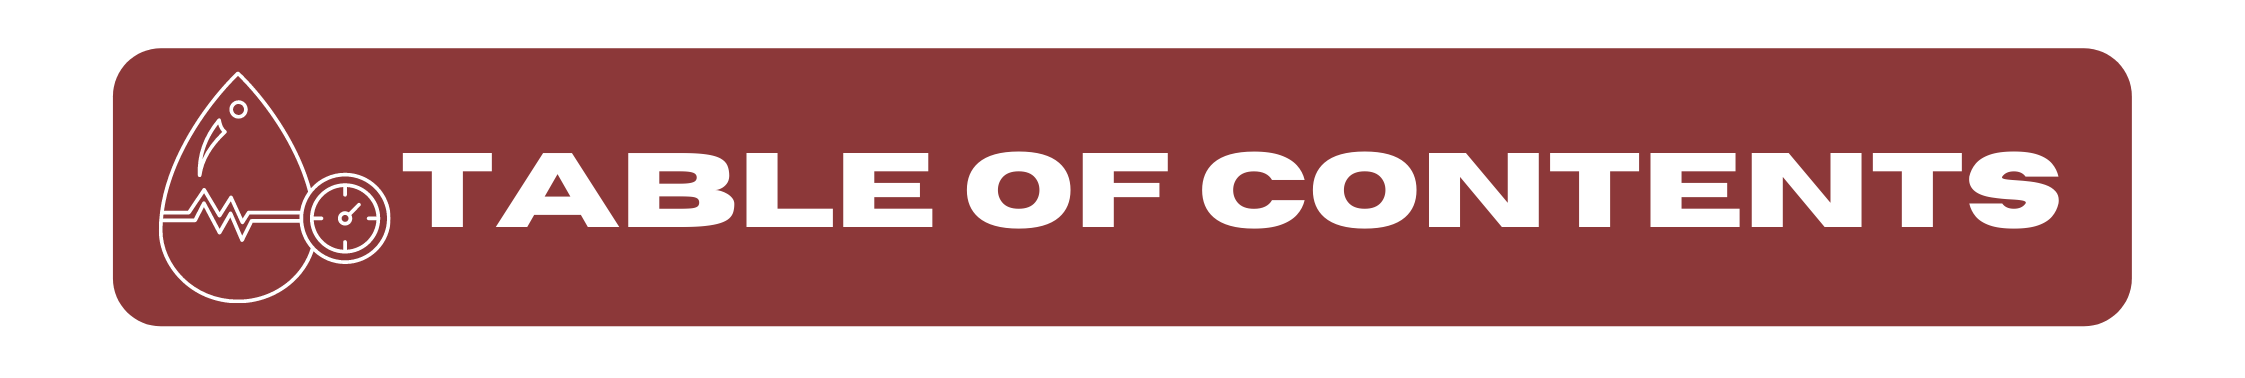
</div>
<a id='0'></a>
# 1. <a href='#1'>Introduction</a>
- 1.1 Libraries/Utilities <a href='#1.1'>Link</a>
- 1.2 Data Preprocessing <a href='#1.2'>Link</a>

# 2. <a href='#2'>Exploratory Data Analysis</a>

# 3. <a href='#3'>Data Balancing</a>

#  4. <a href='#4'>Modelling</a>
- 4.1  <a href='#4.1'>Logistic Regression</a>
- 4.2  <a href='#4.2'>Random Forest</a>
- 4.3  <a href='#4.3'>Support Vector Machine</a>
- 4.4  <a href='#4.4'>Artificial Neural Network</a>
- 4.5  <a href='#4.5'>eXtreme Gradient Boosting Classifier (XGBoost)</a>

# 5. <a href='#5'>Summary</a>

<a id='1'></a>
<div>
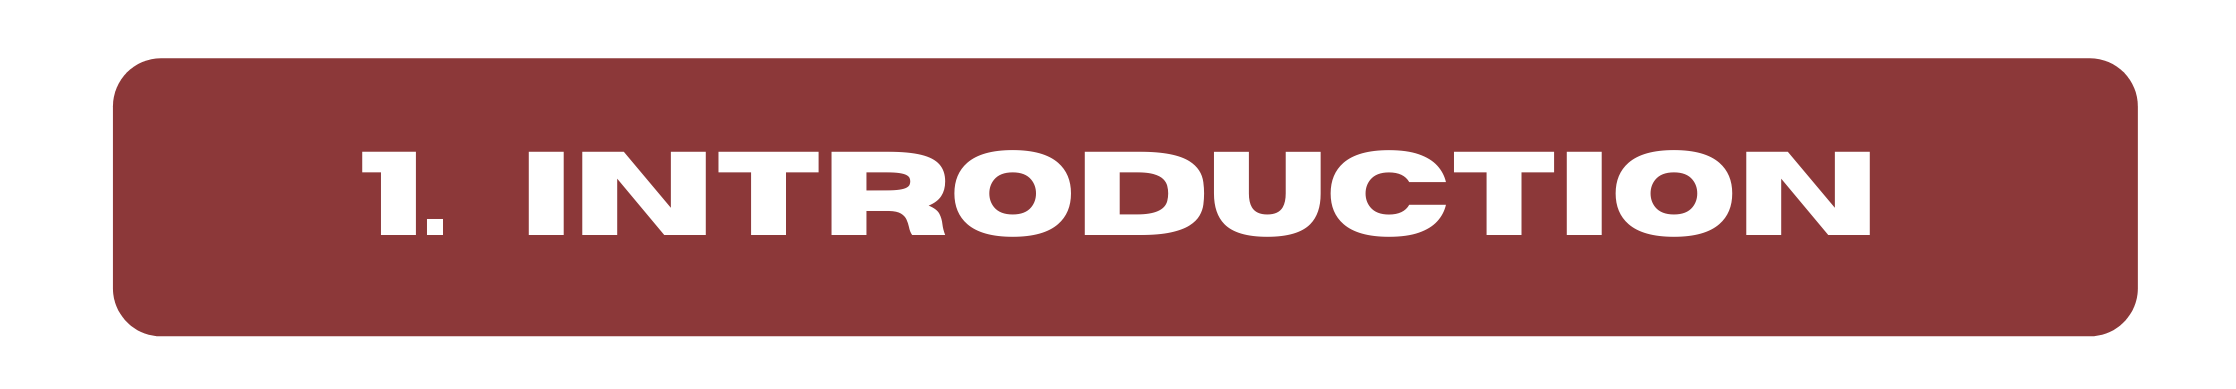
</div>

<a id='1.1'></a>
<div>
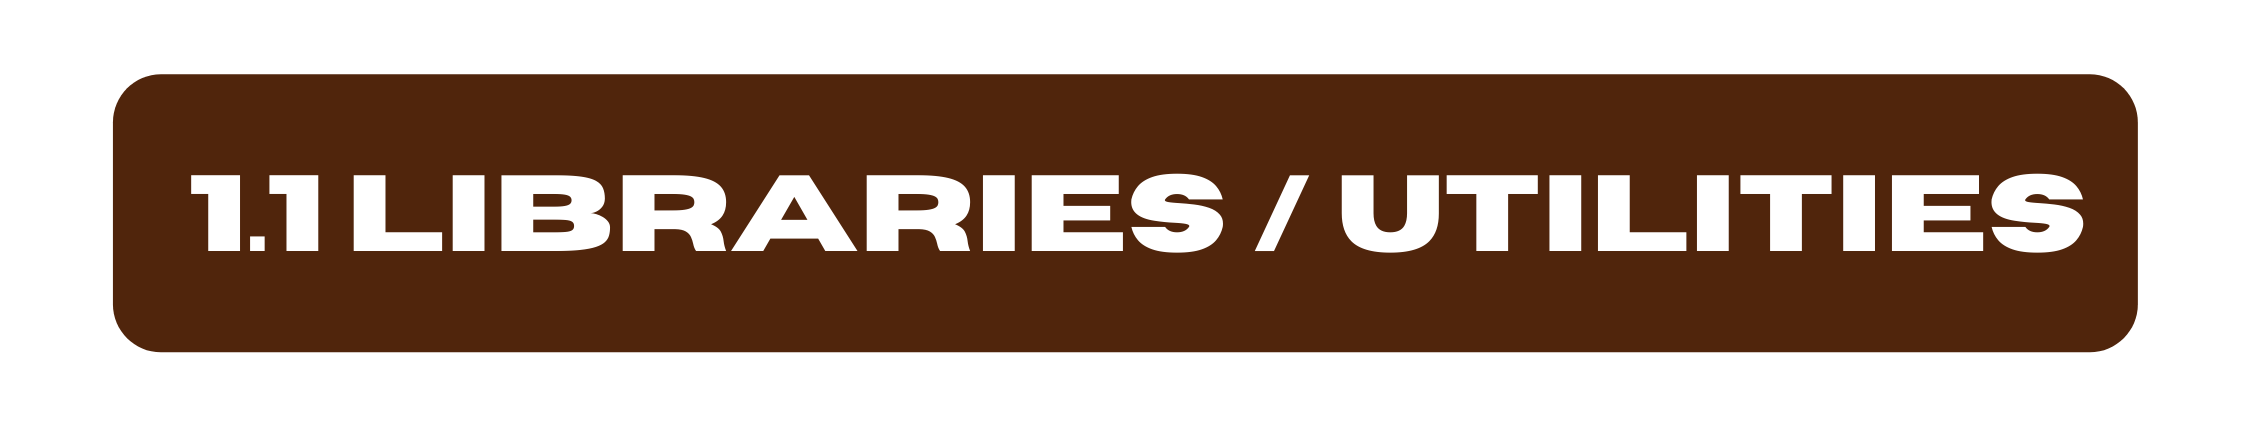
</div>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

import plotly.offline as pyo
pyo.init_notebook_mode()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix,f1_score



<a id='1.2'></a>
<div>
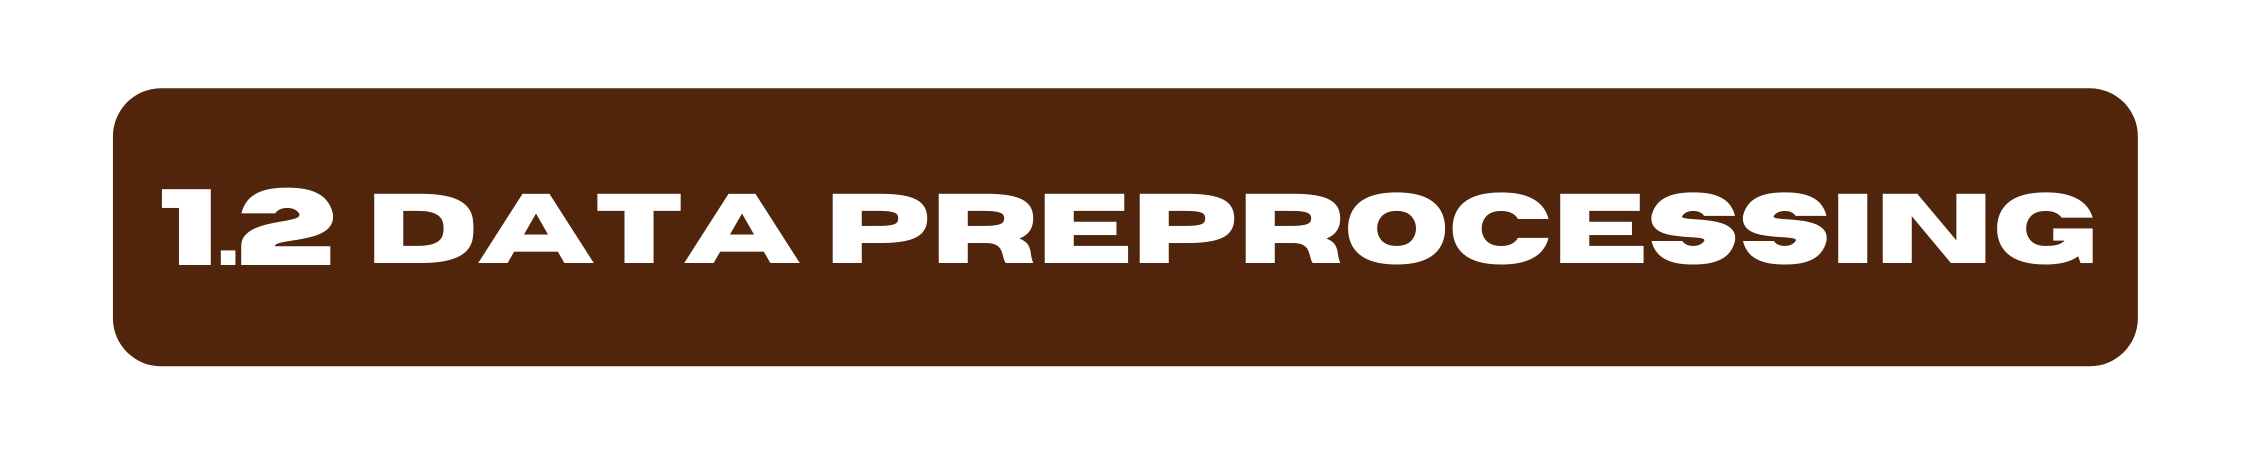
</div>

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

<font color='blood red'><font size="5">With a quick look at our data, smoking_status has more than 2 categories which may be possible to generalise into 2 categories (smoked and never smoked). </font> 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<font color='blue'><font size="5">We have 12 rows,
11 features and 1 label. <br  /> However we can omit id as a feature. Hence we currently 
have 10 features and 1 label to work with.

<font color='blood red'><font size="5">Numerical data: age, avg_glucose_level, bmi</font> 

<font color='blood red'><font size="5">Categorical data: gender, hypertension, heart_disease, ever_married, work_type, residence_type, smoking_status, stroke</font> 

In [4]:
# creating instance of labelencoder
le = LabelEncoder()
# Assigning numerical values and storing in another column
df['gender_Cat'] = le.fit_transform(df['gender'])
df['married_Cat'] = le.fit_transform(df['ever_married'])
df['worktype_Cat'] = le.fit_transform(df['work_type'])
df['Residence_type_Cat'] = le.fit_transform(df['Residence_type'])


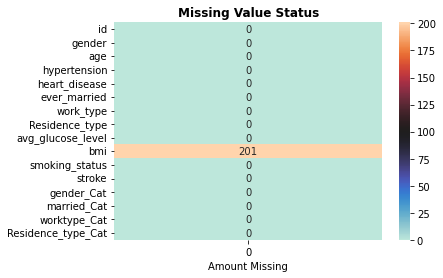

In [5]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='icefire')
ax.set_xlabel('Amount Missing')
plt.show()

<font color='blood red'><font size="5">As we can see, there are 201 missing data in bmi.</font> 

<a id='2'></a>
<div>
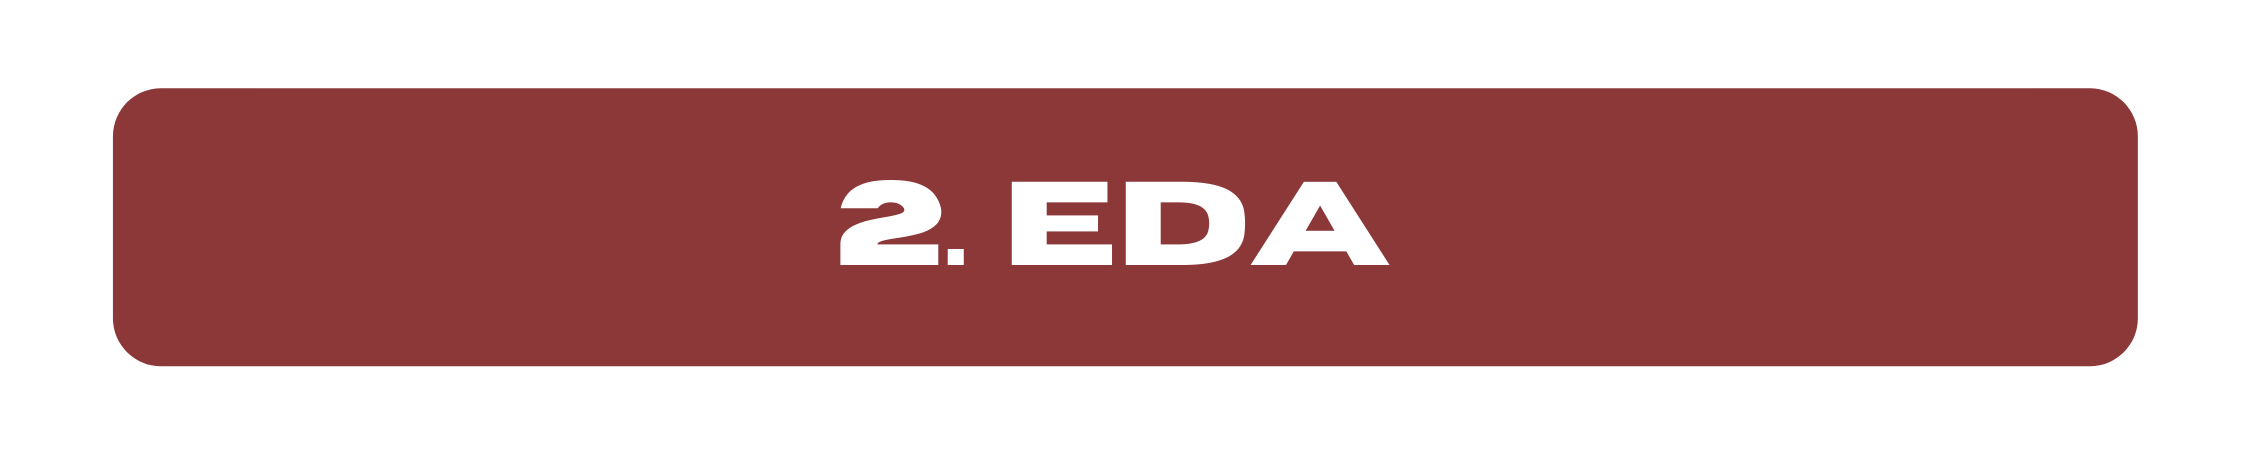
</div>

In [6]:
fig = ex.pie(df,names='hypertension')
fig.update_layout(title='<b>Proportion Of hyptertension Samples<b>')
fig.show()

<font color='blood red'><font size="5">As to be seen, the dataset is very imbalanced.</font><br />

<font color='blood red'><font size="5">We will need to deal with this imbalanced dataset later.</font>

# Feature: Smoking status

In [7]:
fig = ex.pie(df,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Smoking Status Samples<b>')
fig.show()

In [8]:
len(df)

5110

<font color='blood red'><font size="5">Lets drop rows which has unknown smoking status</font>

In [9]:
df = df.drop(df[df['smoking_status']=='Unknown'].index)
len(df)

3566

In [10]:
fig = ex.pie(df,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Smoking Status Samples<b>')
fig.show()

<font color='blood red'><font size="5">Let us combine formerly smoked and smokes to smokes</font>

In [11]:
df.loc[(df['smoking_status'] == 'formerly smoked'), 'smoking_status'] = 'smokes'

In [12]:
fig = ex.pie(df,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Smoking Status Samples<b>')
fig.show()

In [13]:
#Encode smoke data
df['smoking_status_Cat'] = le.fit_transform(df['smoking_status'])

# Feature: BMI

<font color='blood red'><font size="5">Remember we had some missing values for bmi? Let us use predict it with a simple regression model with age, gender,  hypertension and avg_glucose_level to fill in the missing value instead of naively inputting it with the mean or median.

In [14]:
bmi_pipe = Pipeline( steps=[
                            ('scaler',StandardScaler()),
                            ('LinReg',LinearRegression())
                              ])
X = df[['age','avg_glucose_level','hypertension','bmi']].copy()


In [15]:

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(bmi_pipe.predict(Missing[['age','avg_glucose_level','hypertension']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3566 entries, 0 to 5108
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3566 non-null   int64  
 1   gender              3566 non-null   object 
 2   age                 3566 non-null   float64
 3   hypertension        3566 non-null   int64  
 4   heart_disease       3566 non-null   int64  
 5   ever_married        3566 non-null   object 
 6   work_type           3566 non-null   object 
 7   Residence_type      3566 non-null   object 
 8   avg_glucose_level   3566 non-null   float64
 9   bmi                 3566 non-null   float64
 10  smoking_status      3566 non-null   object 
 11  stroke              3566 non-null   int64  
 12  gender_Cat          3566 non-null   int64  
 13  married_Cat         3566 non-null   int64  
 14  worktype_Cat        3566 non-null   int64  
 15  Residence_type_Cat  3566 non-null   int64  
 16  smokin

# Feature: Gender

In [31]:
df["gender"].value_counts()

Female    1834
Male      1157
Other        1
Name: gender, dtype: int64

<font color='blood red'><font size="5">Remove 'Other' Gender since it is very little<br /><br />

In [32]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2991 entries, 2 to 5108
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2991 non-null   int64  
 1   gender              2991 non-null   object 
 2   age                 2991 non-null   int64  
 3   hypertension        2991 non-null   int64  
 4   heart_disease       2991 non-null   int64  
 5   ever_married        2991 non-null   object 
 6   work_type           2991 non-null   object 
 7   Residence_type      2991 non-null   object 
 8   avg_glucose_level   2991 non-null   float64
 9   bmi                 2991 non-null   float64
 10  smoking_status      2991 non-null   object 
 11  stroke              2991 non-null   int64  
 12  gender_Cat          2991 non-null   int64  
 13  married_Cat         2991 non-null   int64  
 14  worktype_Cat        2991 non-null   int64  
 15  Residence_type_Cat  2991 non-null   int64  
 16  smokin

# Summary of features (.describe)

In [17]:
for i in ['age','avg_glucose_level', 'bmi']:
    print(df[i].describe())
    print("\n")

count    3566.000000
mean       48.853898
std        18.874375
min        10.000000
25%        34.000000
50%        50.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64


count    3566.000000
mean      108.982011
std        48.292204
min        55.120000
25%        77.460000
50%        92.650000
75%       116.677500
max       271.740000
Name: avg_glucose_level, dtype: float64


count    3566.000000
mean       30.319306
std         7.160341
min        11.500000
25%        25.400000
50%        29.382768
75%        33.900000
max        92.000000
Name: bmi, dtype: float64




<font color='blood red'><font size="5">Let us remove some outliers with the 1.5 IQR Rule

In [18]:
IQR = df["avg_glucose_level"].quantile(0.75)-df["avg_glucose_level"].quantile(0.25)
upper = df["avg_glucose_level"].quantile(0.75)+1.5*IQR
lower = df["avg_glucose_level"].quantile(0.25)-1.5*IQR

IQR1 = df["bmi"].quantile(0.75)-df["bmi"].quantile(0.25)
upper1 = df["bmi"].quantile(0.75)+1.5*IQR1
lower1 = df["bmi"].quantile(0.25)-1.5*IQR1

index_out = df[(df["avg_glucose_level"]>upper) | (df["avg_glucose_level"]<lower) | (df["bmi"]>upper1) | (df["bmi"]<lower1) ].index
df.drop(index_out, inplace=True)

In [19]:
df.describe()

id          age  hypertension  heart_disease  \
count   2992.000000  2992.000000   2992.000000    2992.000000   
mean   36879.844586    46.971257      0.099933       0.048797   
std    21254.226286    18.799275      0.299961       0.215479   
min       67.000000    10.000000      0.000000       0.000000   
25%    18142.250000    32.000000      0.000000       0.000000   
50%    37549.000000    47.000000      0.000000       0.000000   
75%    55413.500000    61.000000      0.000000       0.000000   
max    72915.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke   gender_Cat  married_Cat  \
count        2992.000000  2992.000000  2992.000000  2992.000000  2992.000000   
mean           91.767701    29.256323     0.044786     0.387366     0.737299   
std            23.417567     5.972700     0.206869     0.487916     0.440175   
min            55.120000    14.100000     0.000000     0.000000     0.000000   
25%            74.875000    24.900000     0.000000     0.000000     0.000000   
50%            88.150000    28.700000     0.000000     0.000000     1.000000   
75%           103.902500    32.700000     0.000000     1.000000     1.000000   
max           175.290000    46.500000     1.000000     2.000000     1.000000   

       worktype_Cat  Residence_type_Cat  smoking_status_Cat  
count   2992.000000         2992.000000         2992.000000  
mean       1.917781            0.509693            0.463570  
std        0.925470            0.499990            0.498754  
min        0.000000            0.000000            0.000000  
25%        2.000000            0.000000            0.000000  
50%        2.000000            1.000000            0.000000  
75%        2.000000            1.000000            1.000000  
max        4.000000            1.000000            1.000000

<font color='blood red'><font size="5">Let us see the correlation matrices</font> 

In [20]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Pearson Correlation', 
                                                                     'Spearman Correlation'))
s_val = df.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1),
    row=1, col=1
)


s_val = df.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1),
    row=2, col=1
)

fig.update_layout(height=700, width=900, title_text="Correlations")
fig.show()

<font color='blood red'><font size="5">As to be seen, the numerical data that correlates most to hypertension are age, avg_glucose_level and bmi. <br /><br />
Lets observe hypertension sample distribution based on Bmi and glucose level and
Hypertension Sample Distribution Based On Bmi And Age.

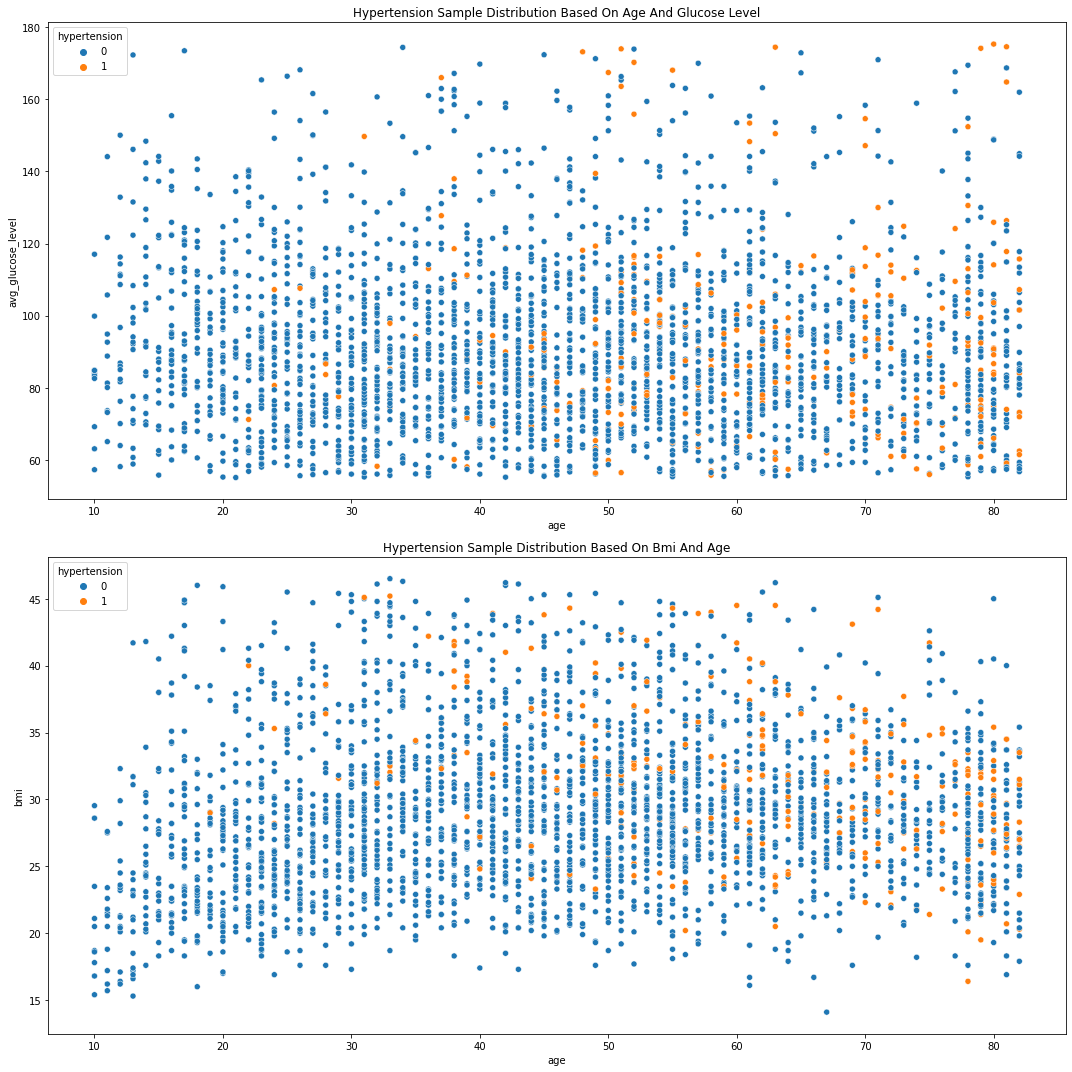

In [21]:
f, axs = plt.subplots(2,1,figsize=(15,15))

plt.subplot(2,1,1)
plt.title('Hypertension Sample Distribution Based On Age And Glucose Level')
sns.scatterplot(x=df['age'],y=df['avg_glucose_level'],hue=df['hypertension'])
plt.subplot(2,1,2)
plt.title('Hypertension Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=df['age'],y=df['bmi'],hue=df['hypertension'])
plt.tight_layout()
plt.show()

<font color='blood red'><font size="5">Age is a very important factor in predicting hypertension

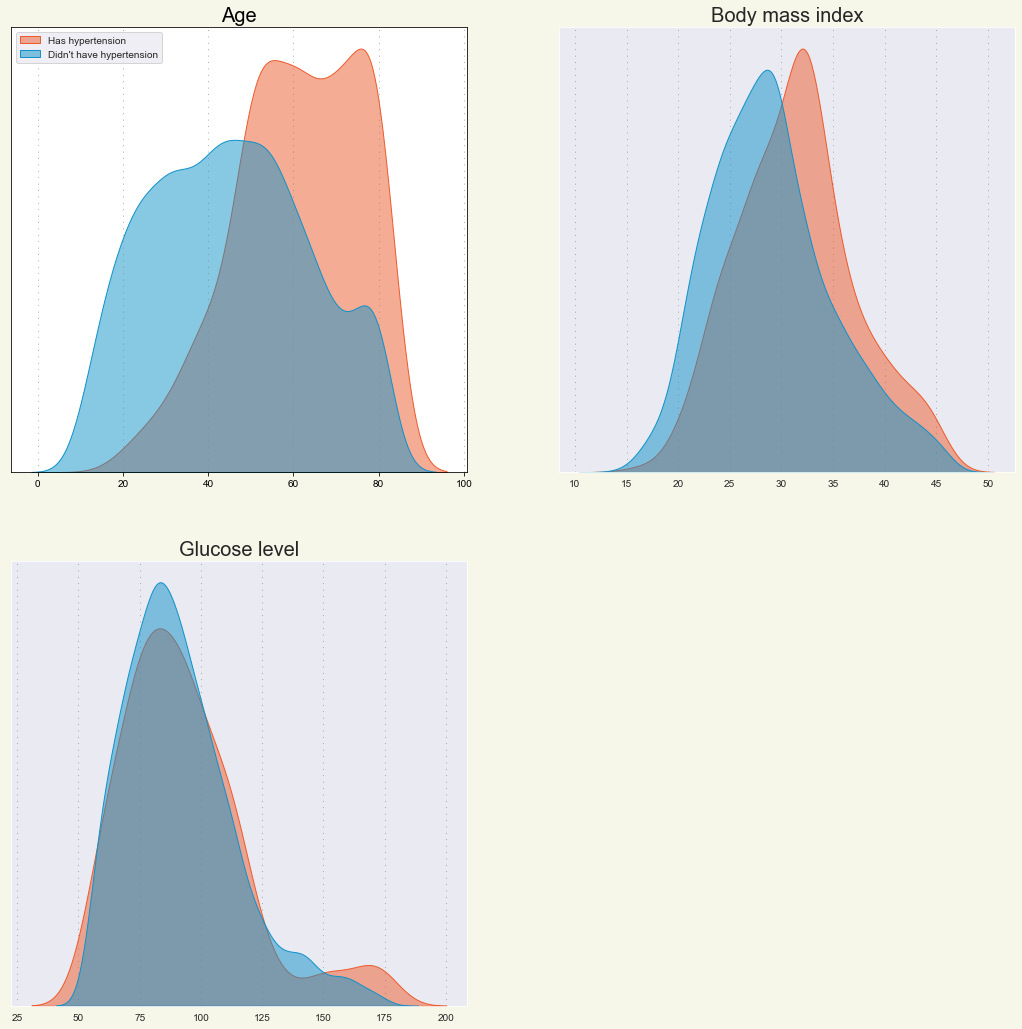

In [22]:
fig = plt.figure(figsize = (18, 18))
fig.patch.set_facecolor('#f6f6e9')

plt.subplot(221)
sns.set_style("dark")
plt.title('Age', size = 20)
sns.kdeplot(df.query('hypertension == 1')['age'], color = '#ed5b2d', shade = True, label = 'Has hypertension', alpha = 0.5)
sns.kdeplot(df.query('hypertension == 0')['age'], color = '#1092c9', shade = True, label = "Didn't have hypertension", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend(loc = 'upper left')

plt.subplot(222)
plt.title('Body mass index', size = 20)
sns.kdeplot(df.query('hypertension == 1')['bmi'], color = '#ed5b2d', shade = True, label = 'Has hypertension', alpha = 0.5)
sns.kdeplot(df.query('hypertension == 0')['bmi'], color = '#1092c9', shade = True, label = "Didn't have hypertension", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend('').set_visible(False)

plt.subplot(223)
plt.title('Glucose level', size = 20)
sns.kdeplot(df.query('hypertension == 1')['avg_glucose_level'], color = '#ed5b2d', shade = True, label = 'Has hypertenson', alpha = 0.5)
sns.kdeplot(df.query('hypertension == 0')['avg_glucose_level'], color = '#1092c9', shade = True, label = "Didn't have hypertension", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend('').set_visible(False)

plt.show()

<font color='blood red'><font size="5">
KDE plot insights


The kde shows the density of the feature for each value of the target. There are usually 2 colored humps representing the 2 values of TARGET. If the humps are well-separated and non-overlapping, then there is a correlation with the TARGET. If the humps are overlapping a lot, then that means the feature is not well-correlated with the TARGET, because the TARGET is equally as common on those values of the feature.

From this understanding, age has correlation with hyptension while body mass index has less correlation and glucose levl has the least correlation with hypertension.

- above the age of 40, one is very likely to have hypertension especially above 50s.
  possible relationship between age and hypertension.


- BMI cannot tell anything (explore more later)

- glucose level < 140 is where one is very likely to not have hypertension. note: this is the range for a normal, healthy person.

- glucose level > 150 is where one is more likely to have hypertension.
  At around glucose level > 200 is where one is more likely to have hypertension.  
  Note: this is the range where one is considered diabetic. 

- possible relationship between glucose levels and hypertension.



In [23]:
stroke = df.copy()
# Create age groups
stroke['age_group'] = 0
for i in range(len(stroke.index)):
    if stroke.iloc[i, 2] < 2:
        stroke.iloc[i, 17] = 'baby'
    elif stroke.iloc[i, 2] < 17 and stroke.iloc[i, 2] >= 2:
        stroke.iloc[i, 17] = 'child'
    elif stroke.iloc[i, 2] < 30 and stroke.iloc[i, 2] >= 17:
        stroke.iloc[i, 17] = 'young adults'
    elif stroke.iloc[i, 2] < 60 and stroke.iloc[i, 2] >= 30:
        stroke.iloc[i, 17] = 'middle-aged adults'
    elif stroke.iloc[i, 2] < 80 and stroke.iloc[i, 2] >= 60:
        stroke.iloc[i, 17] = 'old-aged adults'
    else:
        stroke.iloc[i, 17] = 'long-lived'
        
# Create bmi groups
stroke['bmi_group'] = 0
for i in range(len(stroke.index)):
    if stroke.iloc[i, 9] < 18.5:
        stroke.iloc[i, 13] = 'Underweight'
    elif stroke.iloc[i, 9] < 25.0 and stroke.iloc[i, 9] >= 18.5:
        stroke.iloc[i, 18] = 'Normal weight'
    elif stroke.iloc[i, 9] < 30.0 and stroke.iloc[i, 9] >= 25.0:
        stroke.iloc[i, 18] = 'Overweight'
    else:
        stroke.iloc[i, 18] = 'Obese'
        
# Create glucose groups
stroke['glucose_group'] = 0
for i in range(len(stroke.index)):
    if stroke.iloc[i, 8] < 100:
        stroke.iloc[i, 19] = 'Normal'
    elif stroke.iloc[i, 8] >= 100 and stroke.iloc[i, 8] < 125:
        stroke.iloc[i, 19] = 'Prediabetes'
    else:
        stroke.iloc[i, 19] = 'Diabetes'

In [24]:
# Grouping by categorical features
dst_st_age = stroke.groupby(['age_group', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
stroke1 = stroke.groupby(['stroke', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
heart = stroke.groupby(['heart_disease', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
marry = stroke.groupby(['ever_married', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
work = stroke.groupby(['work_type', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
residence = stroke.groupby(['Residence_type', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
glucose_group = stroke.groupby(['glucose_group', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
bmi_group = stroke.groupby(['bmi_group', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
smoking = stroke.query('smoking_status != "Unknown"').groupby(['smoking_status', 'hypertension']).agg({'hypertension': 'count'})\
.rename(columns = {'hypertension': 'count'}).reset_index()

# Create percent column for data frames
def percent(data):
    data['percent'] = 0
    for i in range(len(data.index)):
        if i < len(data.index)-1:
            if data.iloc[i, 0] == data.iloc[i+1, 0]:
                data.iloc[i, 3] = round((data.iloc[i, 2] / (data.iloc[i, 2] + data.iloc[i+1, 2])) * 100, 1)
            elif data.iloc[i, 0] == data.iloc[i-1, 0]:
                data.iloc[i, 3] = 100 - data.iloc[i-1, 3]
            else:
                data.iloc[i, 3] = 100.0
        else:
            if data.iloc[i, 0] == data.iloc[i-1, 0]:
                data.iloc[i, 3] = 100 - data.iloc[i-1, 3]
            else:
                data.iloc[i, 3] = 100.0
            
percent(dst_st_age)
percent(stroke1)
percent(heart)
percent(marry)
percent(work)
percent(residence)
percent(glucose_group)
percent(bmi_group)
percent(smoking)


In [25]:
stroke.head(20)

id  gender   age  hypertension  heart_disease ever_married  \
2   31112    Male  80.0             0              1          Yes   
3   60182  Female  49.0             0              0          Yes   
4    1665  Female  79.0             1              0          Yes   
6   53882    Male  74.0             1              1          Yes   
7   10434  Female  69.0             0              0           No   
10  12109  Female  81.0             1              0          Yes   
11  12095  Female  61.0             0              1          Yes   
12  12175  Female  54.0             0              0          Yes   
15  58202  Female  50.0             1              0          Yes   
18  27458  Female  60.0             0              0           No   
24   4219    Male  71.0             0              0          Yes   
25  70822    Male  80.0             0              0          Yes   
26  38047  Female  65.0             0              0          Yes   
34  14248    Male  48.0             0              0           No   
35    712  Female  82.0             1              1           No   
37  24977  Female  72.0             1              0          Yes   
39  62602  Female  49.0             0              0          Yes   
40   4651    Male  78.0             0              0          Yes   
41   1261    Male  54.0             0              0          Yes   
42  61960    Male  82.0             0              1          Yes   

        work_type Residence_type  avg_glucose_level   bmi smoking_status  \
2         Private          Rural             105.92  32.5   never smoked   
3         Private          Urban             171.23  34.4         smokes   
4   Self-employed          Rural             174.12  24.0   never smoked   
6         Private          Rural              70.09  27.4   never smoked   
7         Private          Urban              94.39  22.8   never smoked   
10        Private          Rural              80.43  29.7   never smoked   
11       Govt_job          Rural             120.46  36.8         smokes   
12        Private          Urban             104.51  27.3         smokes   
15  Self-employed          Rural             167.41  30.9   never smoked   
18        Private          Urban              89.22  37.8   never smoked   
24        Private          Urban             102.87  27.2         smokes   
25  Self-employed          Rural             104.12  23.5   never smoked   
26        Private          Rural             100.98  28.2         smokes   
34       Govt_job          Urban              84.20  29.7   never smoked   
35        Private          Rural              84.03  26.5         smokes   
37        Private          Rural              74.63  23.1         smokes   
39        Private          Urban              60.91  29.9   never smoked   
40        Private          Rural              78.03  23.9         smokes   
41        Private          Urban              71.22  28.5   never smoked   
42        Private          Urban             144.90  26.4         smokes   

    stroke  gender_Cat married_Cat  worktype_Cat  Residence_type_Cat  \
2        1           1           1             2                   0   
3        1           0           1             2                   1   
4        1           0           1             3                   0   
6        1           1           1             2                   0   
7        1           0           0             2                   1   
10       1           0           1             2                   0   
11       1           0           1             0                   0   
12       1           0           1             2                   1   
15       1           0           1             3                   0   
18       1           0           0             2                   1   
24       1           1           1             2                   1   
25       1           1           1             3                   0   
26       1           0  

In [26]:
dst_st_age

age_group  hypertension  count  percent
0               child             0    132    100.0
1          long-lived             0     82     73.2
2          long-lived             1     30     26.8
3  middle-aged adults             0   1413     91.9
4  middle-aged adults             1    124      8.1
5     old-aged adults             0    572     80.7
6     old-aged adults             1    137     19.3
7        young adults             0    494     98.4
8        young adults             1      8      1.6

In [27]:
dst_st_age.iloc[[2,4,6,8], 1] = "Had hypertension"
dst_st_age.iloc[[0,1,3,5,7], 1] = "Didn't have hypertension"

stroke1.iloc[[0,1], 0] = 'No stroke'
stroke1.iloc[[2,3], 0] = 'Stroke'

heart.iloc[[0,1], 0] = 'No heart diseases'
heart.iloc[[2,3], 0] = 'Heart diseases'

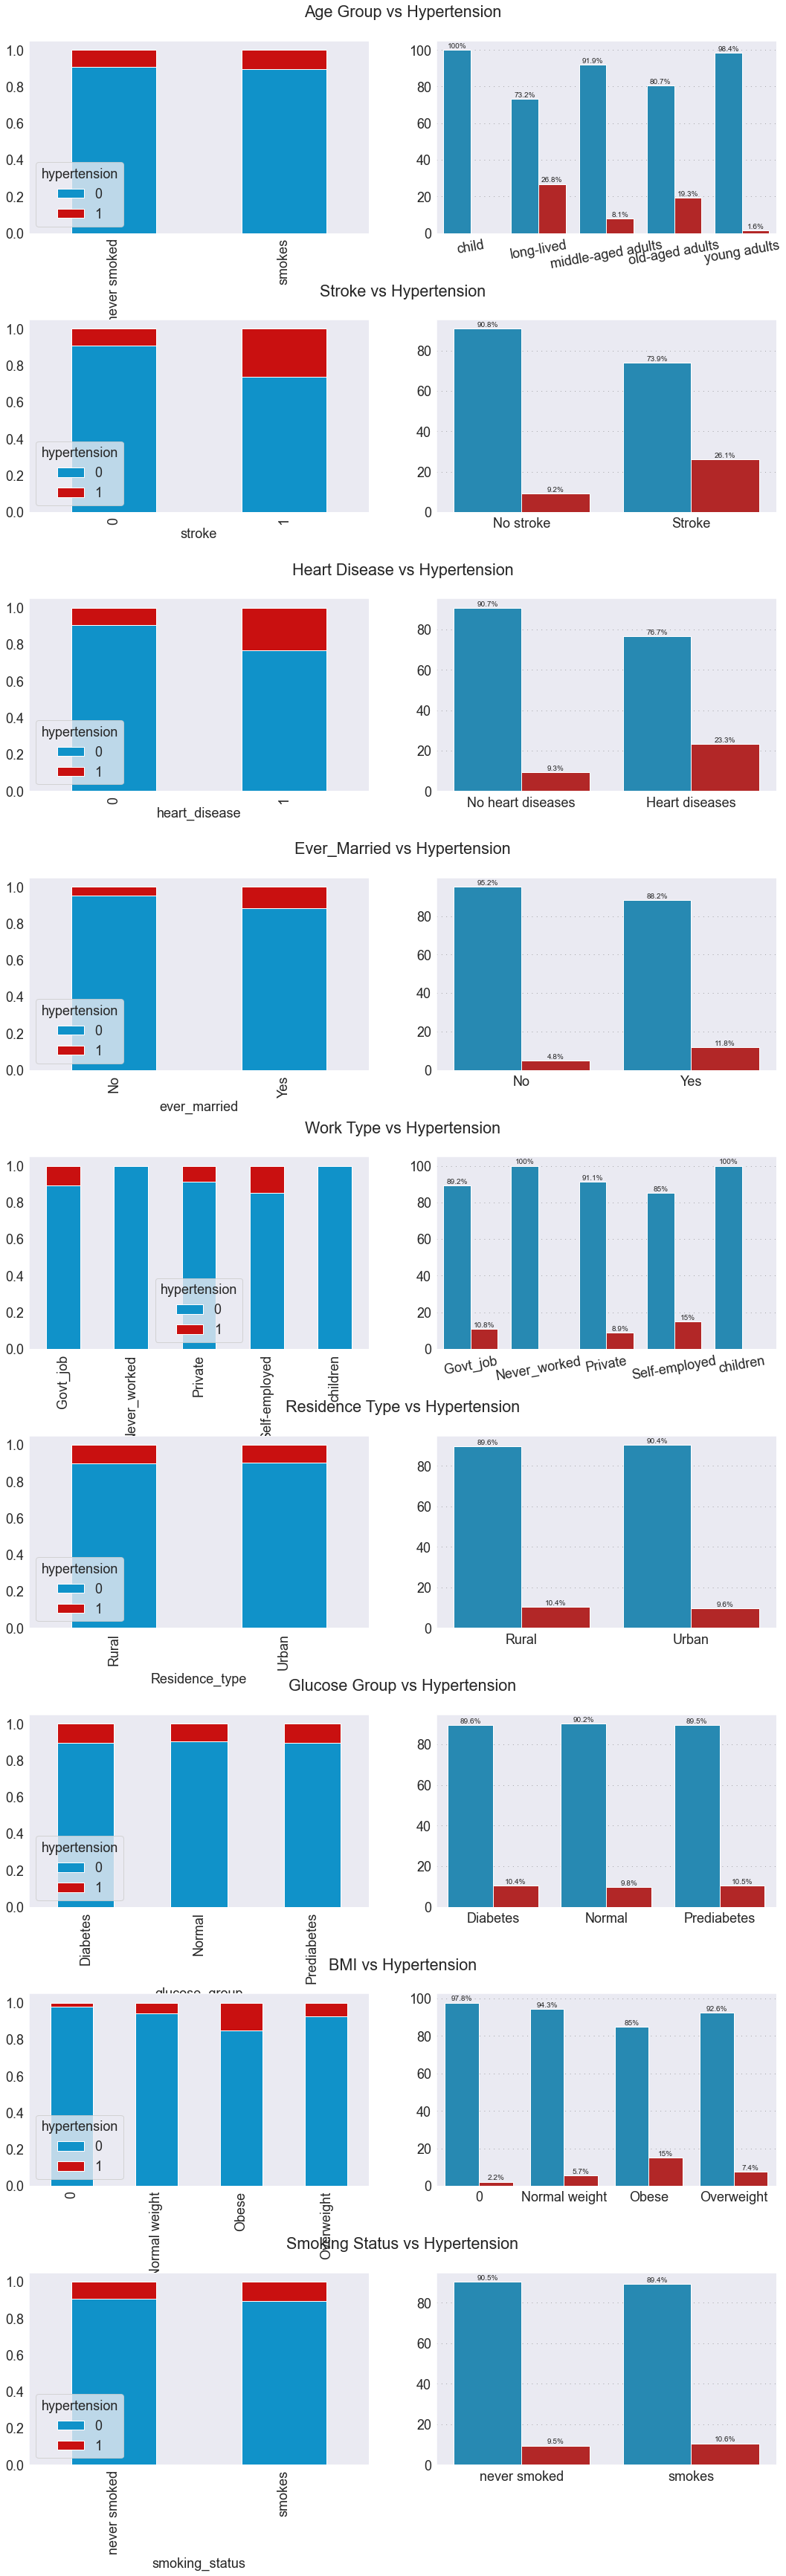

In [86]:
plt.rcParams['figure.figsize'] = 7, 5
plt.rcParams.update({'font.size': 18})
ax.tick_params(labelrotation=45)
fig.tight_layout()
fig.patch.set_facecolor('#fafafa')
f, axes = plt.subplots(9, 2, figsize=(18,60))
f.subplots_adjust(hspace=.45)



a=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[0,0],  color = ['#1092c9','#c91010'])
axes[0,0].set_title('Age Group vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,2)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
a2 = sns.barplot(data = dst_st_age, x = dst_st_age['age_group'], y = dst_st_age['percent'], hue = dst_st_age['hypertension'], palette = ['#1092c9','#c91010',])
plt.xticks(rotation = 10)
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

##########

table=pd.crosstab(stroke.stroke,stroke.hypertension)
b=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[1,0],  color = ['#1092c9','#c91010',])
axes[1,0].set_title('Stroke vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,4)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
b2 = sns.barplot(data = stroke1, x = stroke1['stroke'], y = stroke1['percent'], hue = stroke1['hypertension'], palette = ['#1092c9','#c91010',])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

##########

table=pd.crosstab(stroke.heart_disease,stroke.hypertension)
c=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[2,0], color = ['#1092c9','#c91010',])
axes[2,0].set_title('Heart Disease vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,6)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
c2 = sns.barplot(data = heart, x = heart['heart_disease'], y = heart['percent'], hue = heart['hypertension'], palette = ['#1092c9','#c91010',])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

##########
table=pd.crosstab(stroke.ever_married,stroke.hypertension)
d=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[3,0], color = ['#1092c9','#c91010',])
axes[3,0].set_title('Ever_Married vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,8)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
d2 = sns.barplot(data = marry, x = marry['ever_married'], y = marry['percent'], hue = marry['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########
table=pd.crosstab(stroke.work_type,stroke.hypertension)
e=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[4,0], color = ['#1092c9','#c91010',])
axes[4,0].set_title('Work Type vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,10)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
e2 = sns.barplot(data = work, x = work['work_type'], y = work['percent'], hue = work['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation = 10)
plt.legend('').set_visible(False)
##########
table=pd.crosstab(stroke.Residence_type,stroke.hypertension)
f=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[5,0], color = ['#1092c9','#c91010',])
axes[5,0].set_title('Residence Type vs Hypertension', y=1.1 , x=1.1)
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,12)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
f2 = sns.barplot(data = residence, x = residence['Residence_type'], y = residence['percent'], hue = residence['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########

table=pd.crosstab(stroke.glucose_group,stroke.hypertension)
g=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[6,0], color = ['#1092c9','#c91010'])
axes[6,0].set_title('Glucose Group vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,14)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
g2 = sns.barplot(data = glucose_group, x = glucose_group['glucose_group'], y = glucose_group['percent'], hue = glucose_group['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########
table=pd.crosstab(stroke.bmi_group,stroke.hypertension)
h=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[7,0],color = ['#1092c9','#c91010'])
axes[7,0].set_title('BMI vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,16)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
h2 = sns.barplot(data = bmi_group, x = bmi_group['bmi_group'], y = bmi_group['percent'], hue = bmi_group['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########
table=pd.crosstab(stroke.smoking_status, stroke.hypertension)
j=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[8,0],color = ['#1092c9','#c91010'])
axes[8,0].set_title('Smoking Status vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,18)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
j2 = sns.barplot(data = smoking, x = smoking['smoking_status'], y = smoking['percent'], hue = smoking['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########
# add annotations

for i in [a2,b2,c2,d2,e2,f2,g2,h2,j2]:
    for p in i.patches:
        height = p.get_height()
        i.annotate(f'{height:g}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
        
plt.show()

<font color='blood red'><font size="5">based on barplots <br /><br />

1) Age Group

 - long-lived and middle-aged adults are more likely to have hypertension.
 - strong correlation between age group and hypertension.

2) Stroke and Heart Diseases
- strong correlation between stroke and hypertension.
- strong correlation between heart diseases and hypertension.
- However, this can still happen to those who did not have stroke or heart diseases given available data.

3) Ever Married
- weak correlation between marriage status and hypertension.
- if ever married, there is higher risk of hypertension.

4) Work Type
- percentages for govt job, private and self-employed are very similar.
- note that the data is very imbalanced. (alot of private, everything else very little)
- hard to check relationship as there are only 14 who never worked, which is a stark difference in data amount compared to the rest.

5) Residence Type
- residence type do not seem to affect since the percentages are quite similar.
- not much correlation.

6) Glucose Group
- those with diabetes are more likely to have hypertension.
- strong correlation between glucose levels and hypertension.

7) BMI
- those who are obese are more likely to have hypertension.
- strong correlation between bmi and hypertension.

8) Smoking
- smoking do not seem to affect since the percentages are quite similar.
- not much correlation.

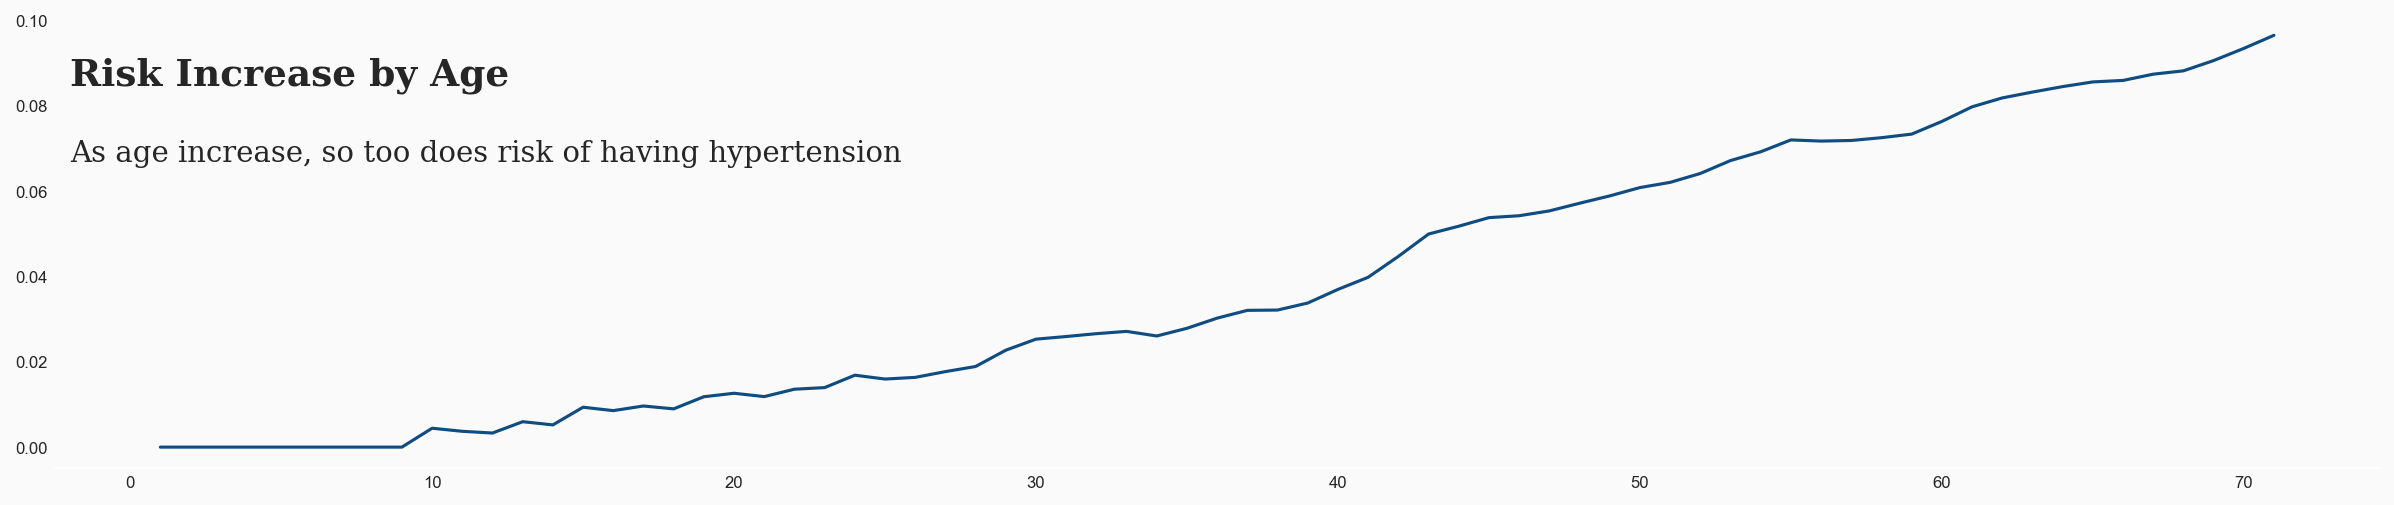

In [29]:
background_color = "#fafafa"
fig = plt.figure(figsize=(20, 10), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)


df['age'] = df['age'].astype(int)

rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['hypertension'].sum() / len(df[df['age'] < i]['hypertension']))

sns.lineplot(data=rate,color='#0f4c81',ax=ax0)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(-2,0.085,'Risk Increase by Age',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-2,0.067,'As age increase, so too does risk of having hypertension',fontsize=14,fontfamily='serif')


plt.show()

<font color='blood red'><font size="5">Distribution plot of BMI<br /><br />

In [30]:
bmi = list(df['bmi'].values)
hist_data = [bmi]
group_labels = ["bmi"]
colors = ['#1f77b4']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.update_layout({"template":"plotly_dark"})
fig.show()

# Label: Hypertension

In [33]:
df['hypertension'].value_counts()

0    2692
1     299
Name: hypertension, dtype: int64

<font color='blood red'><font size="5"><a href='#2'>As mentioned earlier, we have an imbalanced data.</a><br /><br />
<font color='blood red'><font size="3">Standard ML methods, such as Decision Tree and Logistic Regression, tend to deviate from the majority class and tend to ignore the minority class.<br /><br />
    They tend to only predict the majority class, hence have a significant misclassification of the minority class as compared to the majority class. 
    
<font color='blood red'><font size="3"> So, we should to do SMOTE (Synthetic Minority Over-sampling Technique) - one of the most commonly used resampling techniques to solve the imbalance problem.

<a id='3'></a>
<div>
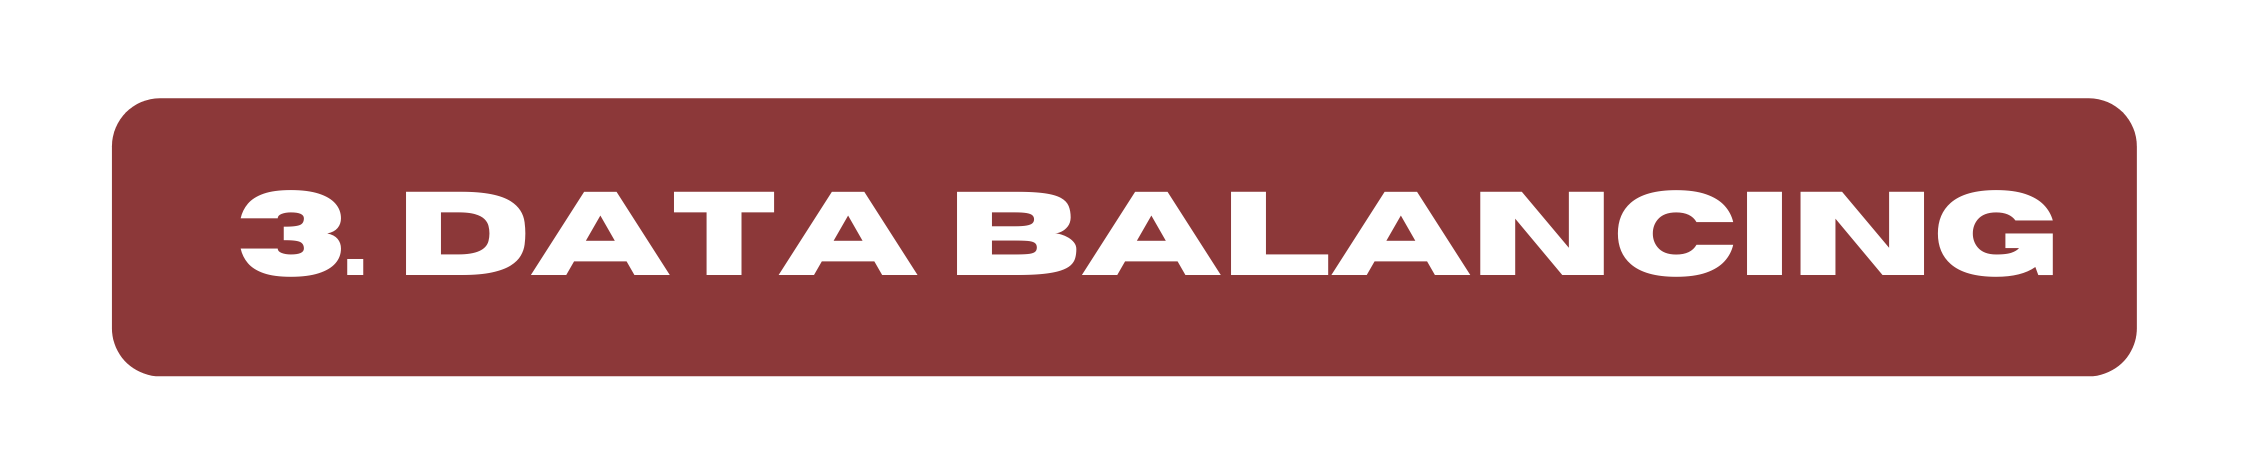
</div>

# SMOTE

In [34]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2991 entries, 2 to 5108
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2991 non-null   int64  
 1   gender              2991 non-null   object 
 2   age                 2991 non-null   int64  
 3   hypertension        2991 non-null   int64  
 4   heart_disease       2991 non-null   int64  
 5   ever_married        2991 non-null   object 
 6   work_type           2991 non-null   object 
 7   Residence_type      2991 non-null   object 
 8   avg_glucose_level   2991 non-null   float64
 9   bmi                 2991 non-null   float64
 10  smoking_status      2991 non-null   object 
 11  stroke              2991 non-null   int64  
 12  gender_Cat          2991 non-null   int64  
 13  married_Cat         2991 non-null   int64  
 14  worktype_Cat        2991 non-null   int64  
 15  Residence_type_Cat  2991 non-null   int64  
 16  smokin

In [35]:
from imblearn.over_sampling import SMOTE
X=df1.copy().drop(['hypertension','id', 'gender','ever_married', 'work_type','Residence_type','smoking_status'],axis=1)
y=df1['hypertension']
smote = SMOTE()

X_balanced, X_test, Y_balanced, y_test = train_test_split(X,y, test_size = 0.2)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_balanced, Y_balanced)

X_train_balanced_list=X_train_balanced.columns.values.tolist()

print(X_train_balanced_list)

['age', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Cat', 'married_Cat', 'worktype_Cat', 'Residence_type_Cat', 'smoking_status_Cat']


In [36]:
X_train_balanced.shape

(4310, 10)

In [37]:
from collections import Counter
print(Counter(Y_train_balanced))
print(Counter(y_test))

Counter({0: 2155, 1: 2155})
Counter({0: 537, 1: 62})


In [38]:
X_train_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4310 entries, 0 to 4309
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 4310 non-null   int64  
 1   heart_disease       4310 non-null   int64  
 2   avg_glucose_level   4310 non-null   float64
 3   bmi                 4310 non-null   float64
 4   stroke              4310 non-null   int64  
 5   gender_Cat          4310 non-null   int64  
 6   married_Cat         4310 non-null   int64  
 7   worktype_Cat        4310 non-null   int64  
 8   Residence_type_Cat  4310 non-null   int64  
 9   smoking_status_Cat  4310 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 336.8 KB


In [39]:
from sklearn.decomposition import PCA
class sampling():
    
    def __init__(self,feat,tar,method,ax): 
        self.feat = feat
        self.tar = tar
        self.method = method
        self.ax = ax
    
        
    # under sampling visualization

    def visualize_data(self):
        
        temp_y = pd.DataFrame({'y':self.tar})
        
        # dimension reduction
        pca = PCA(n_components= 2).fit_transform(self.feat)
        
        self.ax.set_facecolor('#f5f6f6')
        # plotting4
        self.ax.scatter(pca[temp_y['y'] == 0][:,0], pca[temp_y['y'] == 0][:,1], c = '#512b58', s = 10)
        self.ax.scatter(pca[temp_y['y'] == 1][:,0], pca[temp_y['y'] == 1][:,1], c = '#ff005c', s =10)
        
        for loc in ['left','right','top', 'bottom']:
            self.ax.spines[loc].set_visible(False)
        self.ax.axes.get_xaxis().set_visible(False)
        self.ax.axes.get_yaxis().set_visible(False)
        self.ax.set_xticklabels('')
        self.ax.set_yticklabels('')
        self.ax.set_xlim(xmin = -6, xmax = 6)
        self.ax.set_ylim(ymin = -5, ymax = 6)

    
        self.ax.text(1.6,3.8,"Stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='#ff005c')
        self.ax.text(3.2,3.8,"|", fontweight="bold", fontfamily='serif', fontsize=13, color='black')
        self.ax.text(3.4,3.8,"No stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='#512b58')
        self.ax.text(-6,5.5,self.method, {'font': 'serif', 'weight': 'bold', 'size': 20}, alpha = 0.8)
        self.ax.text(-6,4.5,'{} contain {} number of datapoint, \nand targets distribution as {}.'.format(self.method,len(self.feat), {0:Counter(self.tar)[0],1:Counter(self.tar)[1]}), {'font': 'serif', 'weight': 'normal', 'size': 12}, alpha = 0.7)
        

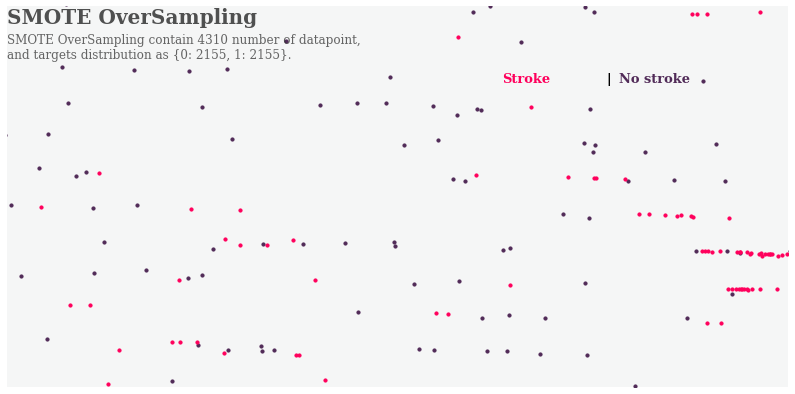

In [40]:
fig = plt.figure(figsize =(14,7))
gs = fig.add_gridspec(1,1)
gs.update(wspace = 0.1, hspace = 0.1)
ax1 = fig.add_subplot(gs[0,0])
axes = [ax1]
sampling(X_train_balanced, Y_train_balanced,'SMOTE OverSampling',ax=ax1).visualize_data() 

<a id='4'></a>
<div>
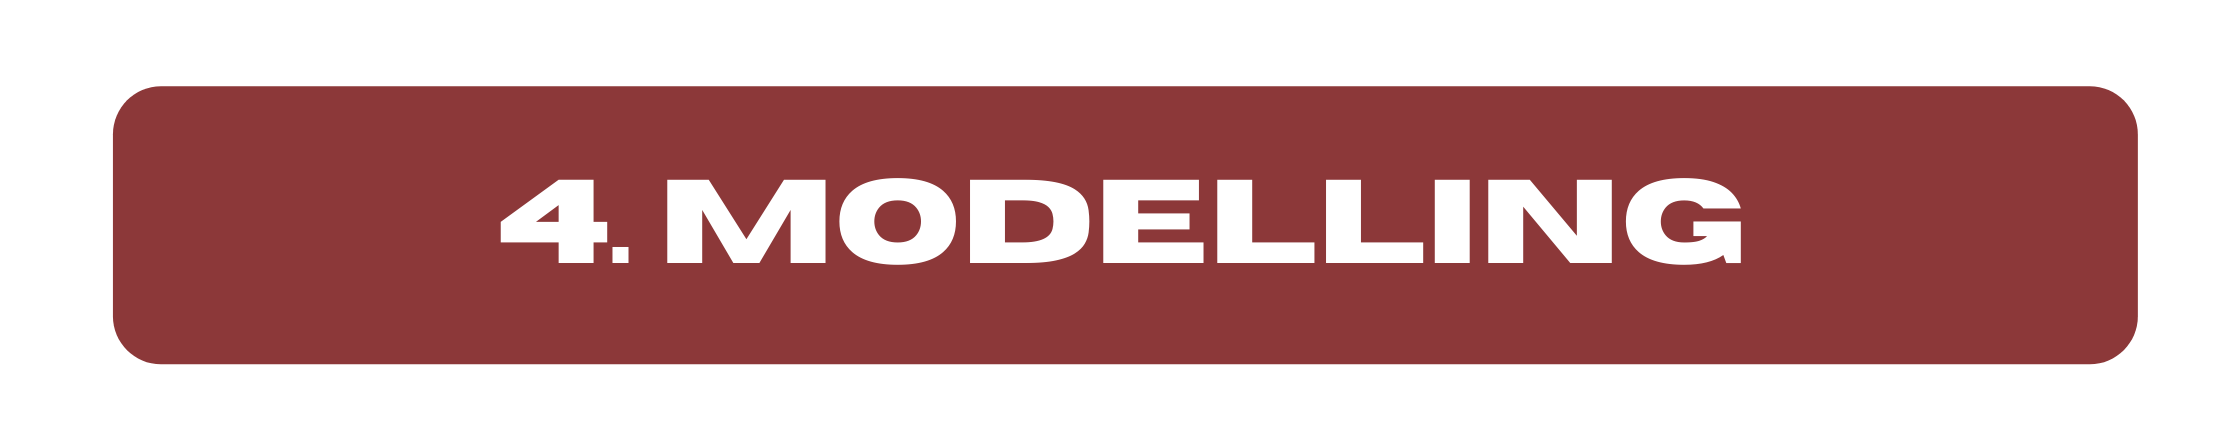
</div>

<a id='4.1'></a>
<div>
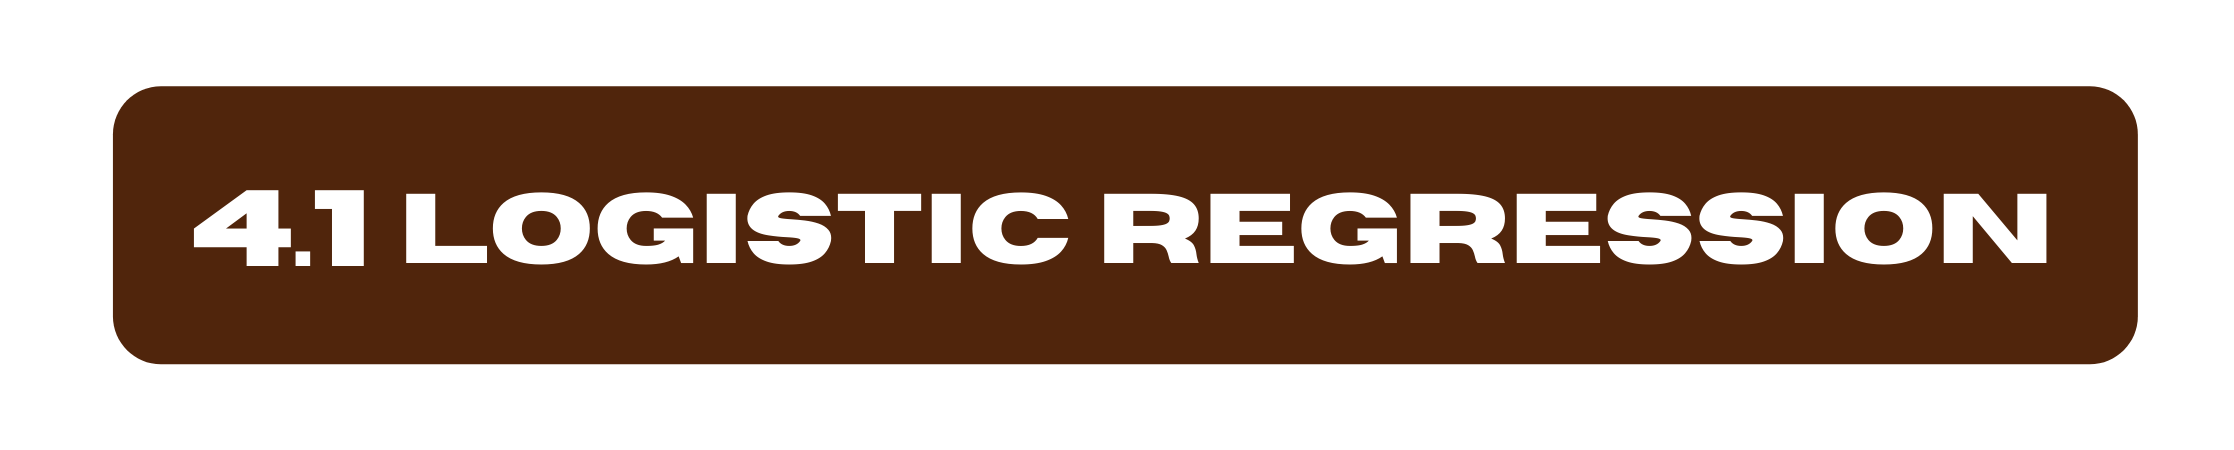
</div>

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=600)
rfe = RFE(estimator=model, n_features_to_select=4)
fit = rfe.fit(X_train_balanced, Y_train_balanced)
print("Num Features: %s" % (fit.n_features_))
features = {'Features': X_train_balanced_list,'Selected Features':fit.support_ ,'Feature Ranking':fit.ranking_}
rfe_df = pd.DataFrame(features)
rfe_df
# got issues adding in the feature importance coefficients into the dataframe model.estimator_.coeff_

Num Features: 4


Features  Selected Features  Feature Ranking
0                 age              False                6
1       heart_disease              False                2
2   avg_glucose_level              False                7
3                 bmi              False                4
4              stroke              False                5
5          gender_Cat               True                1
6         married_Cat               True                1
7        worktype_Cat              False                3
8  Residence_type_Cat               True                1
9  smoking_status_Cat               True                1

<font color='blood red'><font size="5">Features picked by RFE: gender, married, residence type and smoking status<br /><br />

<font color='blood red'><font size="5">which should we focus on?

- <font color='blood red'><font size="3"> Precision = (True Positive) / (Total predicted positive)
   
- <font color='blood red'><font size="3"> Recall = (True Positive) / (Total actual positive)

- <font color='blood red'><font size="3"> F1 = 2* ( precision * recall) / (precision + recall)

<font color='blood red'><font size="4"> Since we are predicting hypertension, the impact of False Negatives are much more undesirable as compared to False Positives. It is worse for a patient to go undiagnosed and fail to receive proper treatment, than to have a minor false scare about having hypertension. (when one does not have it)
Thus it makes sense to focus more on Recall instead of Precision.

<font color='blood red'><font size="4"> However, precision can tell us how accurate/precise our model is out of those predicted positive, how many are actual positive, which is an important aspect too.

<font color='blood red'><font size="4"> F1 score allows us to seek a balance between Precision and Recall. While it may seem like a good measure, this means that we are compromising on Recall.
    
<font color='blood red'><font size="4"> Going back to the reasons why we wanted to do this project, hypertension is like a 'silent killer', thus our priority should be on minimising the number of False Negatives.
    
<font color='blood red'><font size="5">
Hence, we focus on Recall scores.

In [42]:
fit1 = model.fit(X_train_balanced, Y_train_balanced)
y_pred1 = fit1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82       537
           1       0.18      0.50      0.27        62

    accuracy                           0.72       599
   macro avg       0.56      0.62      0.55       599
weighted avg       0.85      0.72      0.77       599



In [43]:
y_pred = fit.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.61      0.73       537
           1       0.10      0.39      0.16        62

    accuracy                           0.59       599
   macro avg       0.50      0.50      0.45       599
weighted avg       0.81      0.59      0.67       599



<AxesSubplot:>

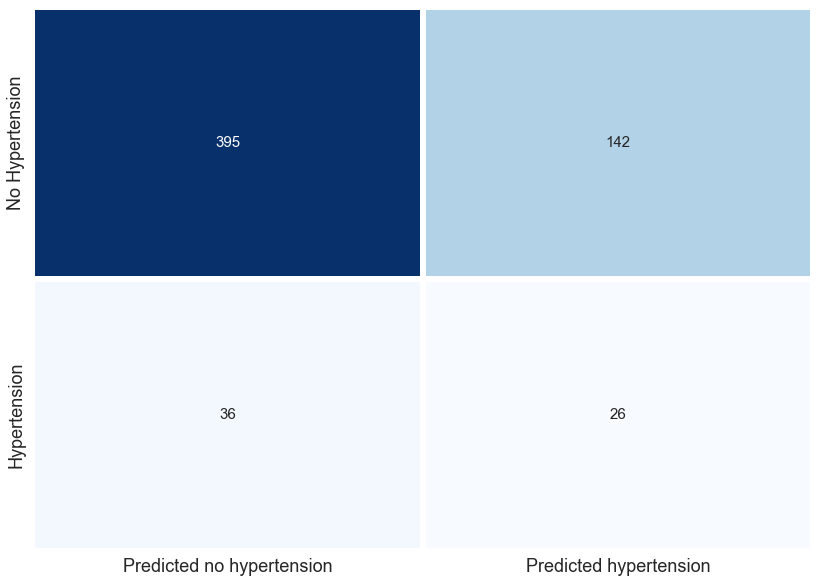

In [68]:
plt.rcParams['figure.figsize'] = 14, 10
lr_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(lr_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> The support values show that our dataset is not well-balanced. Majority of the dataset is class 0, which is no hypertension.
- <font color='blood red'><font size="4"> our recall score shows that logistic regression is balanced at predicting hypertension and no hypertension. (0.58 vs 0.56)

<font color='blood red'><font size="5">as seen in our confusion matrix,
- <font color='blood red'><font size="4"> number of false negatives and true positives are low. ( 33 , 45 )
- <font color='blood red'><font size="4"> number of true negatives and false positives are high. ( 354 , 282 )

<a id='4.2'></a>
<div>
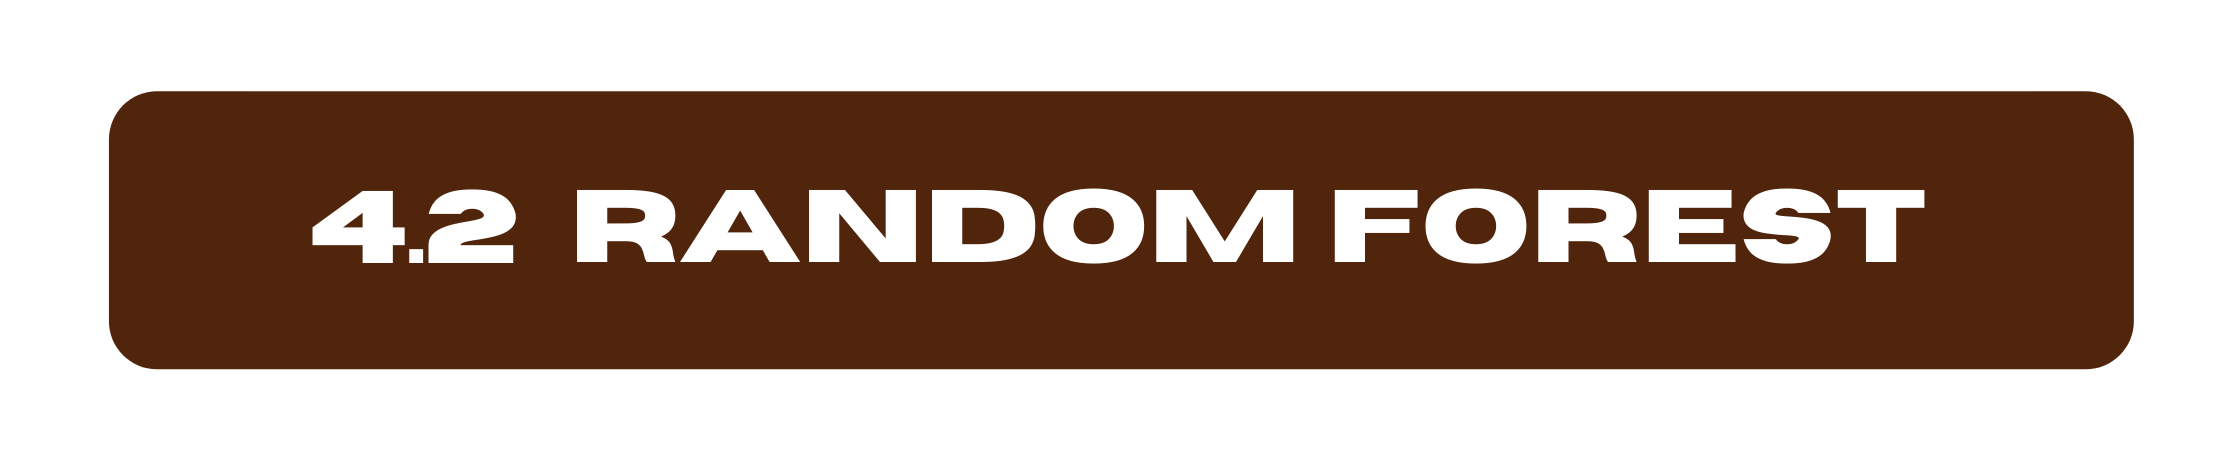
</div>

In [69]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10)
model.fit(X_train_balanced, Y_train_balanced)


RandomForestClassifier(n_estimators=10)

In [70]:
rfe2 = RFE(estimator=model, n_features_to_select=4)
fit2 = rfe2.fit(X_train_balanced, Y_train_balanced)
print("Num Features: %s" % (fit.n_features_))
features = {'Features': X_train_balanced_list,'Selected Features':fit.support_ ,'Feature Ranking':fit.ranking_}
rfe_df2 = pd.DataFrame(features)
rfe_df2

Num Features: 4


Features  Selected Features  Feature Ranking
0                 age              False                6
1       heart_disease              False                2
2   avg_glucose_level              False                7
3                 bmi              False                4
4              stroke              False                5
5          gender_Cat               True                1
6         married_Cat               True                1
7        worktype_Cat              False                3
8  Residence_type_Cat               True                1
9  smoking_status_Cat               True                1

<font color='blood red'><font size="5">Features picked by RFE: gender, married, residence type and smoking status<br /><br />

In [71]:
y_pred1 = fit2.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       537
           1       0.16      0.26      0.20        62

    accuracy                           0.78       599
   macro avg       0.53      0.55      0.54       599
weighted avg       0.83      0.78      0.80       599



In [72]:
model.score(X_test, y_test)

0.8213689482470785

In [73]:
y_pred=model.predict(X_test)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       537
           1       0.22      0.27      0.24        62

    accuracy                           0.82       599
   macro avg       0.56      0.58      0.57       599
weighted avg       0.84      0.82      0.83       599



<AxesSubplot:>

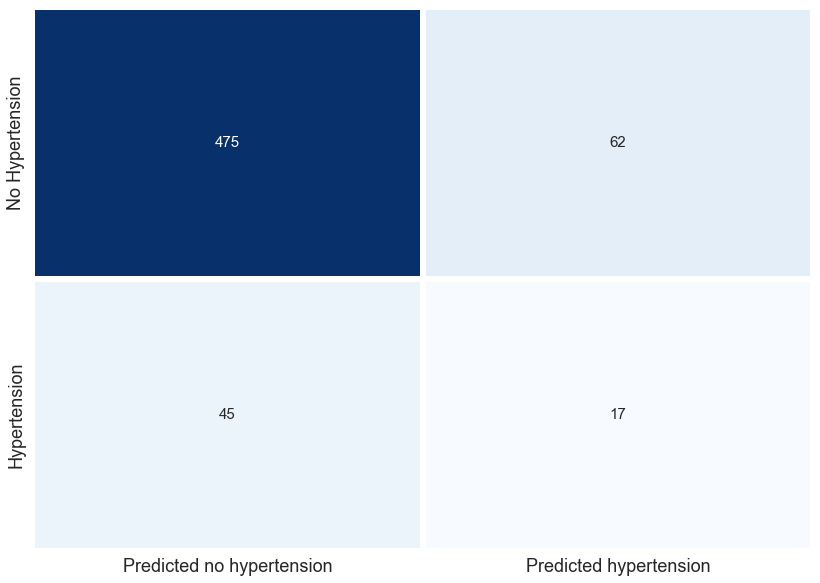

In [75]:
rf_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(rf_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])


<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> The support values show that our dataset is not well-balanced. Majority of the dataset is class 0, which is no hypertension.
- <font color='blood red'><font size="4"> our recall score for class 1 (hypertension) is significantly lower than for class 0 (no hypertension). which means random forest only detected 38% of all those who have hypertension.

<font color='blood red'><font size="5">as seen in our confusion matrix,
- <font color='blood red'><font size="4"> number of false negatives and true positives are low. ( 48 , 30 )
- <font color='blood red'><font size="4"> number of true negatives and false positives are high. ( 555 , 81 )

<a id='4.3'></a>
<div>
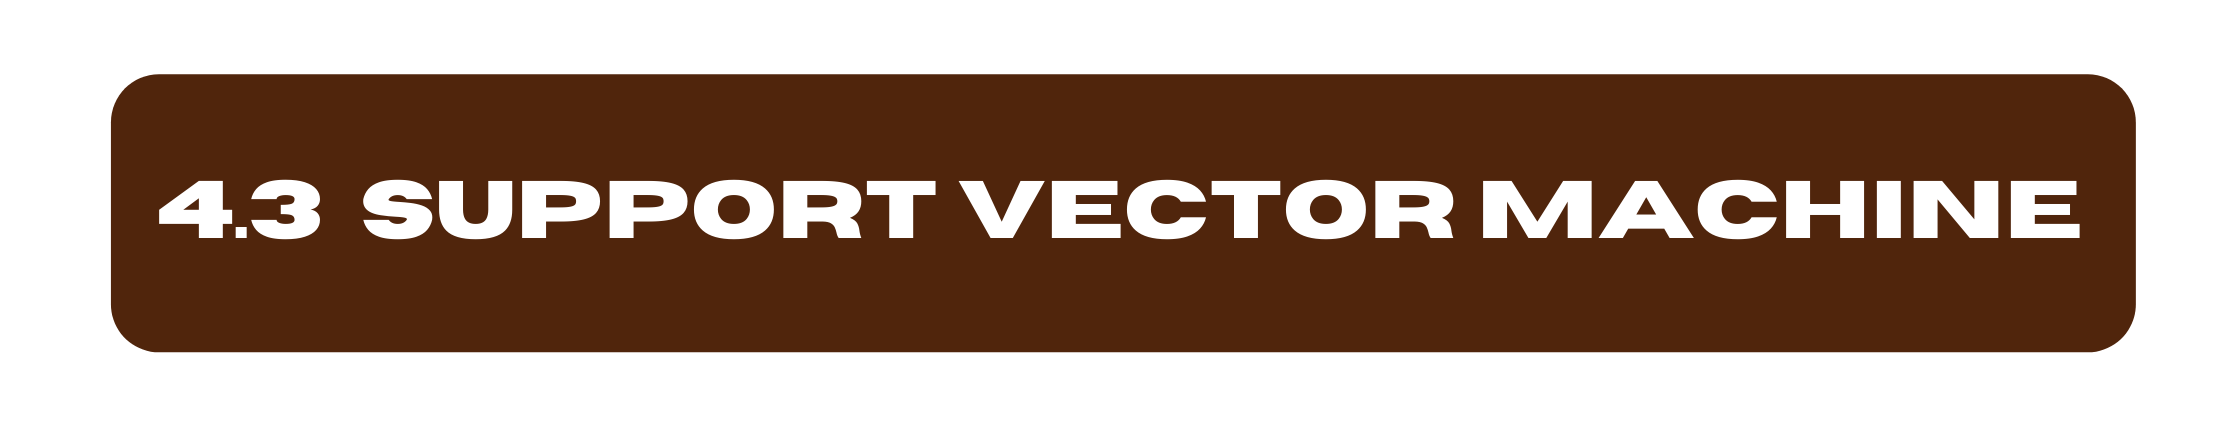
</div>

# Support Vector Machine

In [76]:
svc = SVC()
svc.fit(X_train_balanced, Y_train_balanced)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.57      0.72       537
           1       0.19      0.84      0.30        62

    accuracy                           0.60       599
   macro avg       0.58      0.71      0.51       599
weighted avg       0.89      0.60      0.68       599



<AxesSubplot:>

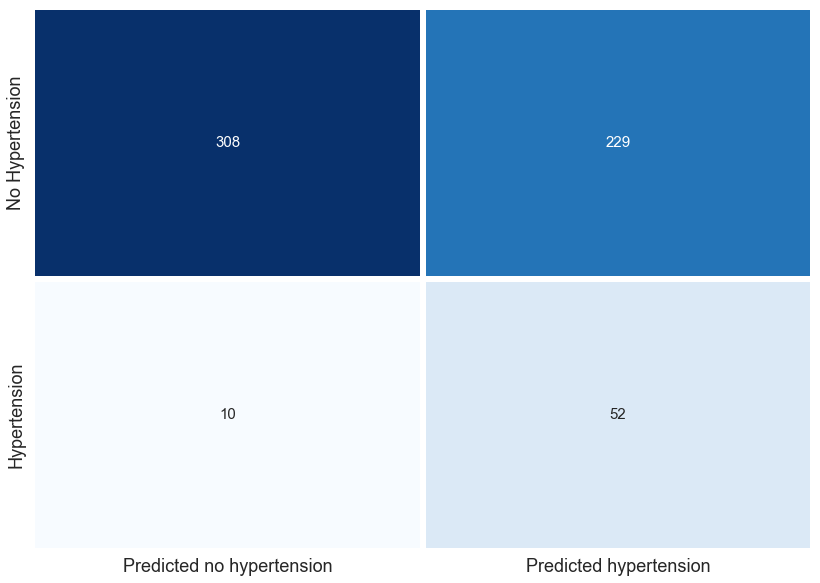

In [77]:
svc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> The support values show that our dataset is not well-balanced. Majority of the dataset is class 0, which is no hypertension.
- <font color='blood red'><font size="4"> our recall score for class 1 (hypertension) is much higher than for class 0 (no hypertension). (0.86 vs 0.59)

<font color='blood red'><font size="5">as seen in our confusion matrix,
- <font color='blood red'><font size="4"> number of false negatives and true positives are low. ( 11 , 67 )
- <font color='blood red'><font size="4"> number of true negatives and false positives are high. ( 375 , 261 )

<a id='4.4'></a>
<div>
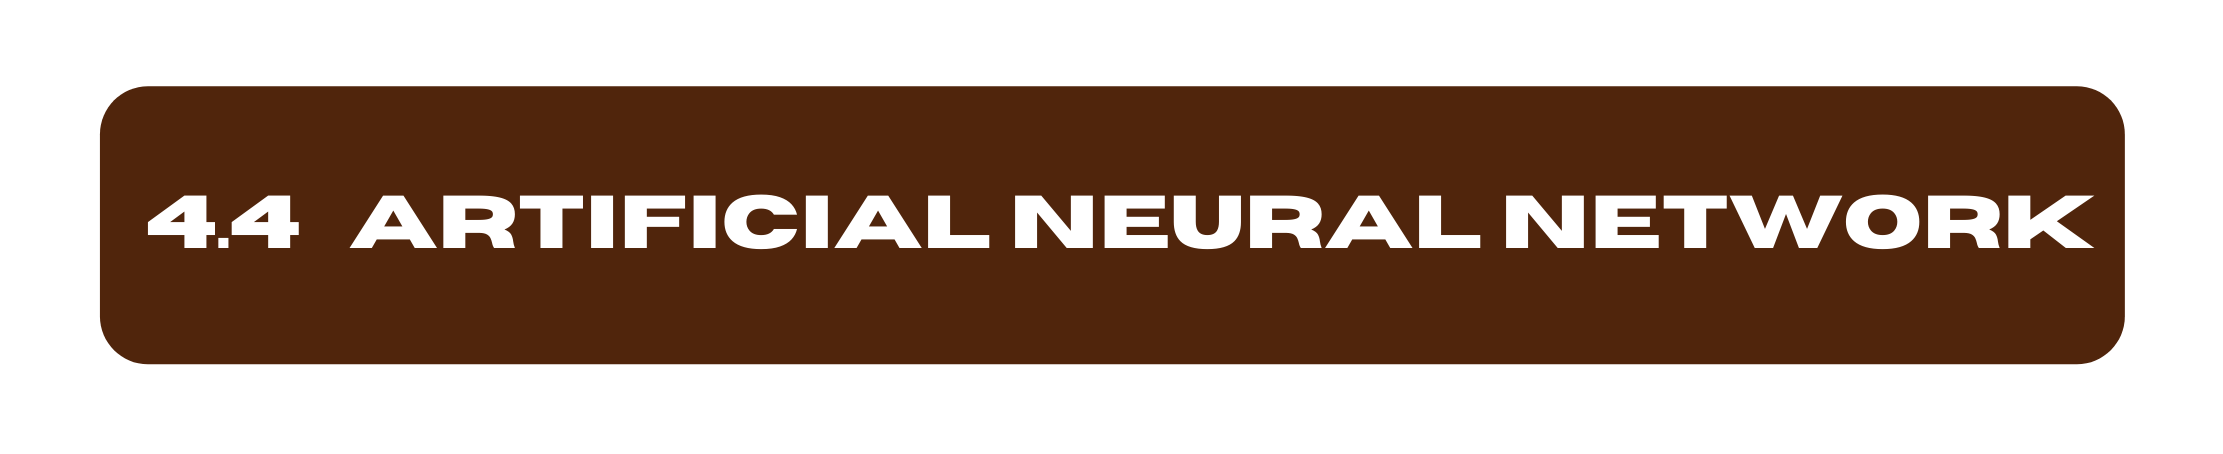
</div>

# Artificial Neural Network

In [78]:
import tensorflow as tf
from tensorflow import keras

#the line below fixes kernal appears to have died problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [79]:
dropout = 0.1
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train_balanced.shape[-1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(dropout),         
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 54        
_________________________________________________________________
dropout_6 (Dropout)          (None, 6)                

In [81]:

history1 = model.fit(X_train_balanced, Y_train_balanced, epochs=1000, batch_size=X_train_balanced.size//200, verbose=2, 
                      validation_data=(X_test, y_test))


Train on 4310 samples, validate on 599 samples
Epoch 1/1000
4310/4310 - 1s - loss: 1.5964 - accuracy: 0.5155 - val_loss: 0.7410 - val_accuracy: 0.2371
Epoch 2/1000
4310/4310 - 0s - loss: 0.6979 - accuracy: 0.5079 - val_loss: 0.6940 - val_accuracy: 0.5159
Epoch 3/1000
4310/4310 - 0s - loss: 0.6825 - accuracy: 0.5812 - val_loss: 0.6950 - val_accuracy: 0.5476
Epoch 4/1000
4310/4310 - 0s - loss: 0.6820 - accuracy: 0.5828 - val_loss: 0.6936 - val_accuracy: 0.5810
Epoch 5/1000
4310/4310 - 0s - loss: 0.6746 - accuracy: 0.5905 - val_loss: 0.6841 - val_accuracy: 0.6160
Epoch 6/1000
4310/4310 - 0s - loss: 0.6721 - accuracy: 0.5993 - val_loss: 0.6928 - val_accuracy: 0.5710
Epoch 7/1000
4310/4310 - 0s - loss: 0.6752 - accuracy: 0.5914 - val_loss: 0.6689 - val_accuracy: 0.6411
Epoch 8/1000
4310/4310 - 0s - loss: 0.6751 - accuracy: 0.6002 - val_loss: 0.6626 - val_accuracy: 0.6477
Epoch 9/1000
4310/4310 - 0s - loss: 0.6709 - accuracy: 0.6118 - val_loss: 0.6461 - val_accuracy: 0.7145
Epoch 10/1000
431

4310/4310 - 0s - loss: 0.5480 - accuracy: 0.7260 - val_loss: 0.5021 - val_accuracy: 0.7412
Epoch 78/1000
4310/4310 - 0s - loss: 0.5325 - accuracy: 0.7443 - val_loss: 0.4957 - val_accuracy: 0.7513
Epoch 79/1000
4310/4310 - 0s - loss: 0.5226 - accuracy: 0.7499 - val_loss: 0.4641 - val_accuracy: 0.7863
Epoch 80/1000
4310/4310 - 0s - loss: 0.5361 - accuracy: 0.7418 - val_loss: 0.4302 - val_accuracy: 0.8214
Epoch 81/1000
4310/4310 - 0s - loss: 0.5199 - accuracy: 0.7459 - val_loss: 0.4666 - val_accuracy: 0.7980
Epoch 82/1000
4310/4310 - 0s - loss: 0.5405 - accuracy: 0.7418 - val_loss: 0.4776 - val_accuracy: 0.7963
Epoch 83/1000
4310/4310 - 0s - loss: 0.5307 - accuracy: 0.7469 - val_loss: 0.5670 - val_accuracy: 0.6778
Epoch 84/1000
4310/4310 - 0s - loss: 0.5322 - accuracy: 0.7399 - val_loss: 0.4666 - val_accuracy: 0.7997
Epoch 85/1000
4310/4310 - 0s - loss: 0.5334 - accuracy: 0.7485 - val_loss: 0.4762 - val_accuracy: 0.7913
Epoch 86/1000
4310/4310 - 0s - loss: 0.5221 - accuracy: 0.7471 - val_

Epoch 155/1000
4310/4310 - 0s - loss: 0.5155 - accuracy: 0.7552 - val_loss: 0.5144 - val_accuracy: 0.7129
Epoch 156/1000
4310/4310 - 0s - loss: 0.5275 - accuracy: 0.7404 - val_loss: 0.4041 - val_accuracy: 0.8364
Epoch 157/1000
4310/4310 - 0s - loss: 0.5215 - accuracy: 0.7564 - val_loss: 0.4275 - val_accuracy: 0.8047
Epoch 158/1000
4310/4310 - 0s - loss: 0.5160 - accuracy: 0.7480 - val_loss: 0.4304 - val_accuracy: 0.8013
Epoch 159/1000
4310/4310 - 0s - loss: 0.5152 - accuracy: 0.7575 - val_loss: 0.4383 - val_accuracy: 0.7880
Epoch 160/1000
4310/4310 - 0s - loss: 0.5233 - accuracy: 0.7501 - val_loss: 0.3882 - val_accuracy: 0.8464
Epoch 161/1000
4310/4310 - 0s - loss: 0.5211 - accuracy: 0.7527 - val_loss: 0.3988 - val_accuracy: 0.8381
Epoch 162/1000
4310/4310 - 0s - loss: 0.5154 - accuracy: 0.7564 - val_loss: 0.3980 - val_accuracy: 0.8397
Epoch 163/1000
4310/4310 - 0s - loss: 0.5197 - accuracy: 0.7536 - val_loss: 0.4267 - val_accuracy: 0.8013
Epoch 164/1000
4310/4310 - 0s - loss: 0.5099 -

Epoch 233/1000
4310/4310 - 0s - loss: 0.5155 - accuracy: 0.7626 - val_loss: 0.4539 - val_accuracy: 0.7513
Epoch 234/1000
4310/4310 - 0s - loss: 0.5111 - accuracy: 0.7503 - val_loss: 0.3978 - val_accuracy: 0.8230
Epoch 235/1000
4310/4310 - 0s - loss: 0.5131 - accuracy: 0.7566 - val_loss: 0.4131 - val_accuracy: 0.8130
Epoch 236/1000
4310/4310 - 0s - loss: 0.5130 - accuracy: 0.7592 - val_loss: 0.4252 - val_accuracy: 0.7830
Epoch 237/1000
4310/4310 - 0s - loss: 0.5110 - accuracy: 0.7557 - val_loss: 0.4093 - val_accuracy: 0.8013
Epoch 238/1000
4310/4310 - 0s - loss: 0.5100 - accuracy: 0.7578 - val_loss: 0.4349 - val_accuracy: 0.7713
Epoch 239/1000
4310/4310 - 0s - loss: 0.5135 - accuracy: 0.7580 - val_loss: 0.4125 - val_accuracy: 0.8047
Epoch 240/1000
4310/4310 - 0s - loss: 0.5149 - accuracy: 0.7527 - val_loss: 0.4216 - val_accuracy: 0.8047
Epoch 241/1000
4310/4310 - 0s - loss: 0.5211 - accuracy: 0.7469 - val_loss: 0.3998 - val_accuracy: 0.8214
Epoch 242/1000
4310/4310 - 0s - loss: 0.5212 -

Epoch 311/1000
4310/4310 - 0s - loss: 0.5288 - accuracy: 0.7506 - val_loss: 0.4841 - val_accuracy: 0.7262
Epoch 312/1000
4310/4310 - 0s - loss: 0.5123 - accuracy: 0.7536 - val_loss: 0.4066 - val_accuracy: 0.8097
Epoch 313/1000
4310/4310 - 0s - loss: 0.5053 - accuracy: 0.7575 - val_loss: 0.4131 - val_accuracy: 0.8013
Epoch 314/1000
4310/4310 - 0s - loss: 0.5313 - accuracy: 0.7327 - val_loss: 0.4614 - val_accuracy: 0.7763
Epoch 315/1000
4310/4310 - 0s - loss: 0.5243 - accuracy: 0.7497 - val_loss: 0.5365 - val_accuracy: 0.6995
Epoch 316/1000
4310/4310 - 0s - loss: 0.5386 - accuracy: 0.7390 - val_loss: 0.4894 - val_accuracy: 0.7162
Epoch 317/1000
4310/4310 - 0s - loss: 0.5218 - accuracy: 0.7503 - val_loss: 0.3963 - val_accuracy: 0.8364
Epoch 318/1000
4310/4310 - 0s - loss: 0.5172 - accuracy: 0.7582 - val_loss: 0.4416 - val_accuracy: 0.7546
Epoch 319/1000
4310/4310 - 0s - loss: 0.5119 - accuracy: 0.7490 - val_loss: 0.4782 - val_accuracy: 0.7245
Epoch 320/1000
4310/4310 - 0s - loss: 0.5088 -

Epoch 389/1000
4310/4310 - 0s - loss: 0.5296 - accuracy: 0.7515 - val_loss: 0.4751 - val_accuracy: 0.7362
Epoch 390/1000
4310/4310 - 0s - loss: 0.5263 - accuracy: 0.7499 - val_loss: 0.4140 - val_accuracy: 0.8097
Epoch 391/1000
4310/4310 - 0s - loss: 0.5417 - accuracy: 0.7320 - val_loss: 0.4404 - val_accuracy: 0.7713
Epoch 392/1000
4310/4310 - 0s - loss: 0.5191 - accuracy: 0.7564 - val_loss: 0.4562 - val_accuracy: 0.7529
Epoch 393/1000
4310/4310 - 0s - loss: 0.5277 - accuracy: 0.7448 - val_loss: 0.4389 - val_accuracy: 0.7479
Epoch 394/1000
4310/4310 - 0s - loss: 0.5167 - accuracy: 0.7585 - val_loss: 0.3957 - val_accuracy: 0.8130
Epoch 395/1000
4310/4310 - 0s - loss: 0.5187 - accuracy: 0.7527 - val_loss: 0.4536 - val_accuracy: 0.7496
Epoch 396/1000
4310/4310 - 0s - loss: 0.5135 - accuracy: 0.7589 - val_loss: 0.4533 - val_accuracy: 0.7663
Epoch 397/1000
4310/4310 - 0s - loss: 0.5105 - accuracy: 0.7624 - val_loss: 0.4486 - val_accuracy: 0.7613
Epoch 398/1000
4310/4310 - 0s - loss: 0.5234 -

Epoch 467/1000
4310/4310 - 0s - loss: 0.5295 - accuracy: 0.7381 - val_loss: 0.4706 - val_accuracy: 0.7295
Epoch 468/1000
4310/4310 - 0s - loss: 0.5084 - accuracy: 0.7615 - val_loss: 0.4397 - val_accuracy: 0.7663
Epoch 469/1000
4310/4310 - 0s - loss: 0.5042 - accuracy: 0.7668 - val_loss: 0.4380 - val_accuracy: 0.7546
Epoch 470/1000
4310/4310 - 0s - loss: 0.5042 - accuracy: 0.7599 - val_loss: 0.4401 - val_accuracy: 0.7513
Epoch 471/1000
4310/4310 - 0s - loss: 0.5088 - accuracy: 0.7534 - val_loss: 0.4237 - val_accuracy: 0.7813
Epoch 472/1000
4310/4310 - 0s - loss: 0.5131 - accuracy: 0.7617 - val_loss: 0.4345 - val_accuracy: 0.7596
Epoch 473/1000
4310/4310 - 0s - loss: 0.4995 - accuracy: 0.7633 - val_loss: 0.4174 - val_accuracy: 0.7947
Epoch 474/1000
4310/4310 - 0s - loss: 0.5174 - accuracy: 0.7603 - val_loss: 0.4353 - val_accuracy: 0.7713
Epoch 475/1000
4310/4310 - 0s - loss: 0.5134 - accuracy: 0.7517 - val_loss: 0.4174 - val_accuracy: 0.7880
Epoch 476/1000
4310/4310 - 0s - loss: 0.5101 -

Epoch 545/1000
4310/4310 - 0s - loss: 0.4995 - accuracy: 0.7613 - val_loss: 0.4102 - val_accuracy: 0.8130
Epoch 546/1000
4310/4310 - 0s - loss: 0.5004 - accuracy: 0.7680 - val_loss: 0.4567 - val_accuracy: 0.7379
Epoch 547/1000
4310/4310 - 0s - loss: 0.5016 - accuracy: 0.7652 - val_loss: 0.4285 - val_accuracy: 0.7679
Epoch 548/1000
4310/4310 - 0s - loss: 0.5008 - accuracy: 0.7654 - val_loss: 0.4457 - val_accuracy: 0.7579
Epoch 549/1000
4310/4310 - 0s - loss: 0.5016 - accuracy: 0.7636 - val_loss: 0.4009 - val_accuracy: 0.8097
Epoch 550/1000
4310/4310 - 0s - loss: 0.4991 - accuracy: 0.7666 - val_loss: 0.4363 - val_accuracy: 0.7813
Epoch 551/1000
4310/4310 - 0s - loss: 0.5018 - accuracy: 0.7657 - val_loss: 0.4669 - val_accuracy: 0.7179
Epoch 552/1000
4310/4310 - 0s - loss: 0.5179 - accuracy: 0.7404 - val_loss: 0.4549 - val_accuracy: 0.7462
Epoch 553/1000
4310/4310 - 0s - loss: 0.5038 - accuracy: 0.7626 - val_loss: 0.4137 - val_accuracy: 0.8013
Epoch 554/1000
4310/4310 - 0s - loss: 0.5065 -

KeyboardInterrupt: 

In [ ]:
plt.rcParams['figure.figsize'] = 7, 5
grid = sns.lineplot(data = history1.history['loss'])
grid.set(yscale='log')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:

plt.rcParams['figure.figsize'] = 14, 10

df = pd.DataFrame(history1.history)
df['epoch'] = df.index
val_cols = [x for x in df.columns if x.startswith('val')]
df_val = df[val_cols+['epoch']]
df.drop(columns=val_cols, inplace=True)
df_val.rename(columns={col: col.split('val_')[-1] for col in df_val.columns}, inplace=True)
df['phase'] = 'train'
df_val['phase'] = 'val'
hist_df = pd.concat([df, df_val], ignore_index=True)

fig, axes = plt.subplots()

sns.lineplot(data = hist_df, x='epoch', y='loss', hue='phase')

plt.show()


In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, np.around(y_pred)))

In [ ]:
y_pred = model.predict(X_test)
ann_cm = confusion_matrix(y_test, np.around(y_pred))
sns.heatmap(ann_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> The support values show that our dataset is not well-balanced. Majority of the dataset is class 0, which is no hypertension.
- <font color='blood red'><font size="4"> our recall score for class 1 (hypertension) is much lower than for class 0 (no hypertension). (0.47 vs 0.79)

<font color='blood red'><font size="5">as seen in our confusion matrix,
- <font color='blood red'><font size="4"> number of false negatives and true positives are low. ( 41 , 37 )
- <font color='blood red'><font size="4"> number of true negatives and false positives are high. ( 501 , 135 )

<a id='4.5'></a>
<div>
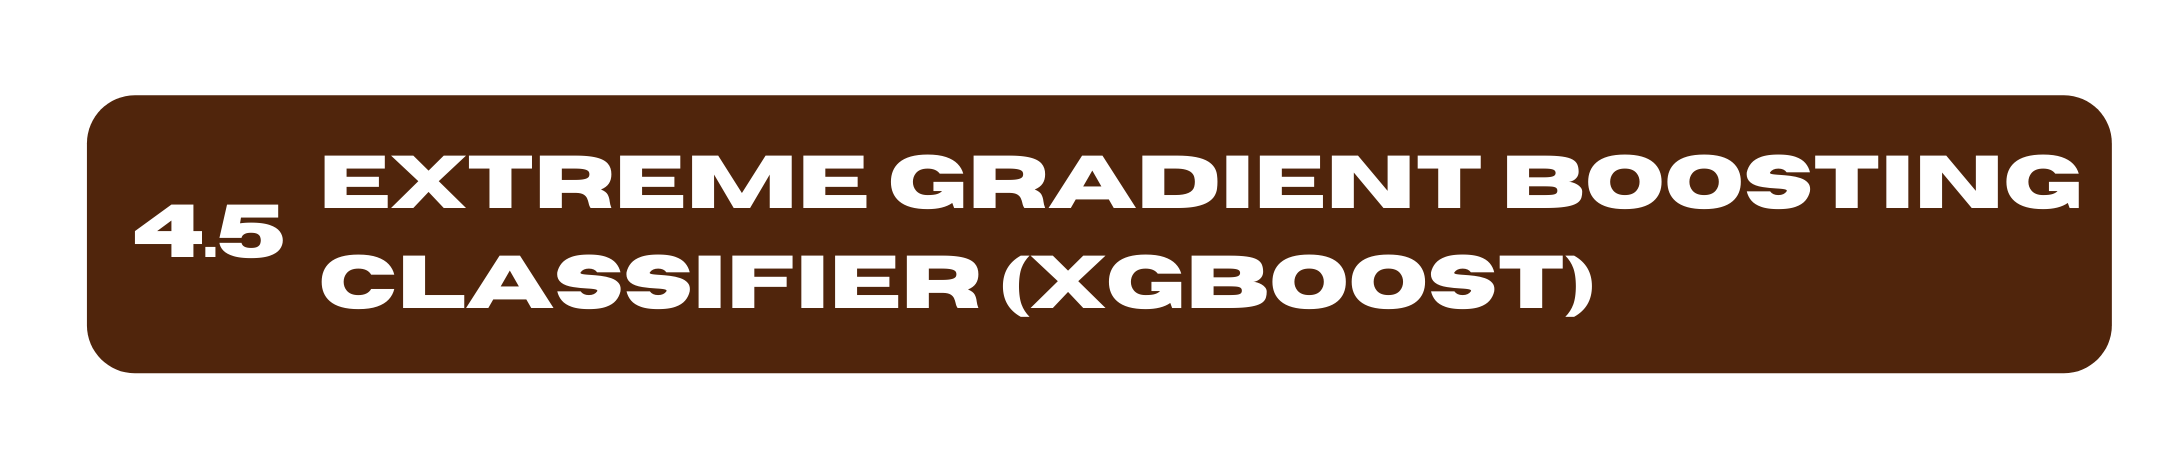
</div>

# eXtreme Gradient Boosting Classifier (XGBoost)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 22, max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss')
xgb.fit(X_train_balanced, Y_train_balanced)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
rfe3 = RFE(estimator=xgb, n_features_to_select=4)
fit3 = rfe3.fit(X_train_balanced, Y_train_balanced)
print("Num Features: %s" % (fit.n_features_))
features = {'Features': X_train_balanced_list,'Selected Features':fit.support_ ,'Feature Ranking':fit.ranking_}
rfe_df3 = pd.DataFrame(features)
rfe_df3

In [ ]:
y_pred3 = fit3.predict(X_test)
print(classification_report(y_test, y_pred3))

In [ ]:
svc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> The support values show that our dataset is not well-balanced. Majority of the dataset is class 0, which is no hypertension.
- <font color='blood red'><font size="4"> our recall score for class 1 (hypertension) is much higher than for class 0 (no hypertension). (0.94 vs 0.15)

<font color='blood red'><font size="5">as seen in our confusion matrix,
- <font color='blood red'><font size="4"> number of false negatives and true positives are low. ( 60 , 18 )
- <font color='blood red'><font size="4"> number of true negatives and false positives are high. ( 561 , 75 )

# K nearest Neighbours


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train_balanced, Y_train_balanced)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
svc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> The support values show that our dataset is not well-balanced. Majority of the dataset is class 0, which is no hypertension.
- <font color='blood red'><font size="4"> our recall score for class 1 (hypertension) is similar to class 0 (no hypertension). (0.62 vs 0.70)

<font color='blood red'><font size="5">as seen in our confusion matrix,
- <font color='blood red'><font size="4"> number of false negatives and true positives are low. ( 30 , 48 )
- <font color='blood red'><font size="4"> number of true negatives and false positives are high. ( 447 , 189 )

<a id='5'></a>
<div>
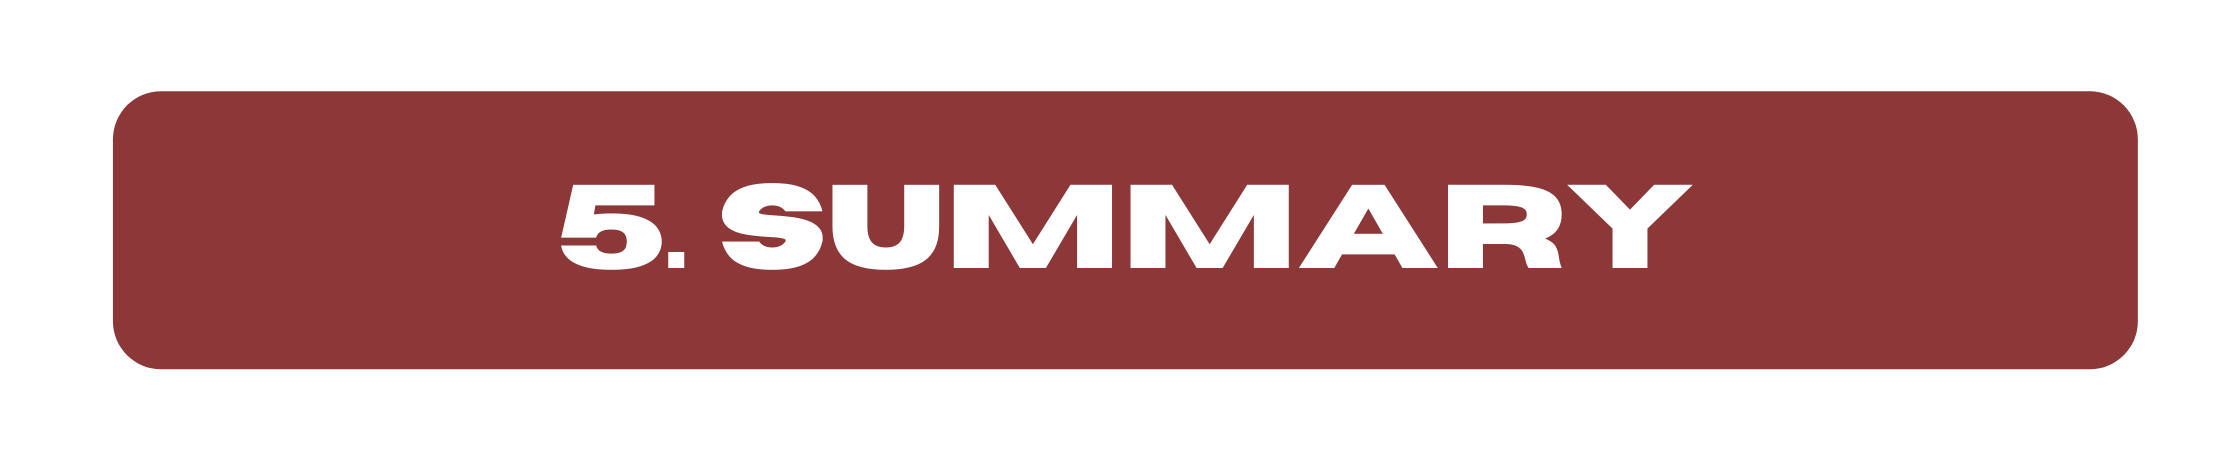
</div>

<font color='blood red'><font size="4">Based on the insights of every model we have used, Support Vector Machine is the best model to use.?????????????
    
- <font color='blood red'><font size="4"> False negative values LOWEST,  Recall score HIGHEST